# Анализ рынка компьютерных игр

### Описание проекта

<p></p>

Предоставлены данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. 
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.  
<b>Задача:</b> выявить закономерности, определяющие успешность игры. 
Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании в 2017г.
    
***Цели Исследования:***
- ознакомиться с данными и выполнить их предобработку(имена колонок, типы данных, пропуски) 
- провести исследовательский анализ данных, дав ответы на вопросы:
  - каково распределение релиза игр по годам?
  - каково распределение продаж игр по платформам?
  - какие платформы лидируют? растут? падают? выделить потенциально прибыльные
  - построить "ящик с усами" по глобальным продажам игр в разбивке по платформам
  - определить влияние на продажи отзывов пользователей и критиков внутри платформ, оценить корреляцию
  - какого распределение игр по жанрам? выделить самые прибыльные, с высокими и с низкими продажами жанры
- составить портрет пользователя каждого региона(Северная Америка, Европа и Япония):
  - топ 5 популярных платформ
  - топ 5 популярных жанров
  - степень влияния рейтинга ESRB на продажи
- проверить гипотезы и сделать выводы:
гипотеза_1: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
гипотеза_2: средние пользовательские рейтинги жанров Action и Sports разные;
- зафиксировать основной вывод исследования и предоставить общие рекомендации

### Описание данных: 

<p></p>
<div style="border:solid black 1px; padding: 20px">
Предоставлены данные по продажам игр - в Северной Америке, Европе, Японии и других странах. 
Всего 16 715 строк в таблице с данными. Данные предоставлены по 11 559 играм. Каждая игра описана 11 признаками, из них 6 - количественные(продажи в разрезе регионов, оценка критиков и пользователей), 4 - категориальные(имя, платформа, жанр, возрастная категория), 1 - временной(год выпуска).   
Данные предоставлены за 2016г.</div>

## Импорт данных и изучение общей информации

In [1]:
# импорт библиотек 
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
import plotly.express as px;
from scipy import stats as st;

In [2]:
# чтение csv-файла
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv', sep=',')
data.head(5)

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

*Предварительно оценив данные, можно уже сейчас отметить, что необходимо поменять имена колонок, в столбцах есть пропуски, некорректные типы данных в некоторых колонках. В столбце Rating следует ознакомиться с уникальными значениями и расшифровать их для дальнейшего анализа.*

In [3]:
# вывод основной информации о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Названия столбцов** следует обработать, привести их к нижнему регистру.    
*В некоторых колонках **некорректный тип данных**. Столбец Year_of_Release имеет тип float вместо int, следует изменить на int. Также столбец User_Score имеет тип данных object, возможно, он содержит строковые занчения. Следует изучить уникальные значения столбца и заменить тип данных на float.*  
В столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating **пропущены значения**. Около 54.5% столбцов имеют пропуски. Их следует обработать: удалить, заполнить фиксированным значением или разделить на логические группы и подобрать фиксированные значения.

In [4]:
# вывод уникальных значений столбца Year_of_Release
data['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [5]:
# вывод уникальных значений столбца Critic_Score
data['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [6]:
# вывод уникальных значений столбца User_Score
data['User_Score'].unique()	

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [7]:
# вывод уникальных значений столбца Rating
data['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

*Мы проверили уникальные значения в столбцах, которые нас интересовали. Отметим следующее:*  
- в столбце Rating значения соответствуют рейтинговой системе. Следует поработать с пропуском - nan, а также 'K-A'. Это значение было заменено на 'E' в 1998 году. Смысловая нагрузка едина, разница лишь в наименовании.
- столбец User_Score имеет пропуски, а также в нем есть значение tbd. Оно и является причиной некорректного типа данных. Следует поработать с этим срезом.
- столбцы Year_of_Release, Critic_Score имеют пропущенные значения - nan, остальные данные корректны.

### Вывод: 

<p></p>

<div style="border:solid pink 5px; padding: 20px">
<li>Мы выгрузили таблицу и присвоили переменной data, импортировали необходимые библиотеки для дальнейшей работы. Далее изучили общую информацию о данных и сделали выводы:
<li>Названия всех столбцов требуют корректировки - приведение к нижнему регистру.</li>
<li>В двух столбцах следует изменить тип данных - Year_of_Release(int), User_Score(float).</li> <li>Необходимо обработать пропуски(NaN) в столбцах: Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.</li>    
<li>В колонках User_Score, Rating значения требуют обработки(замены или группировки) - tbd и K-A соответственно.</li> 
</div>

## Предобработка данных

### Переименование столбцов

In [8]:
# приведение имен колонок к нижнему регистру
data.columns = data.columns.str.lower()

# проверка
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

*Теперь колонки приведениы к одному стилю, с ними удобнее взаимодействовать.    
Перейдем к обработке типа данных*

### Обработка пропусков и некорректных значений

#### Обработка некорректных значений

*Прежде чем заполнять пропуски, следует обработать некорректные значения в двух столбцах.*

*Колонка **User_Score** имеет значение **tbd(to be determind)**. Что говорит о том, что рейтинг не определен/недостаточно оценок для рейтинга/рейтинг формируется. Это значение служит для отметки неясностей или пропусков, которые надо заполнить.  
Изучим срез данных с таким значением.*

In [9]:
# получение среза со значением tbd в колонке user_score
data.query('user_score=="tbd"').head()

name platform  year_of_release  \
119                             Zumba Fitness      Wii           2010.0   
301            Namco Museum: 50th Anniversary      PS2           2005.0   
520                           Zumba Fitness 2      Wii           2011.0   
645                              uDraw Studio      Wii           2010.0   
657  Frogger's Adventures: Temple of the Frog      GBA              NaN   

         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
119     Sports      3.45      2.59       0.0         0.66           NaN   
301       Misc      2.08      1.35       0.0         0.54          61.0   
520     Sports      1.51      1.03       0.0         0.27           NaN   
645       Misc      1.65      0.57       0.0         0.20          71.0   
657  Adventure      2.15      0.18       0.0         0.07          73.0   

    user_score rating  
119        tbd      E  
301        tbd   E10+  
520        tbd      T  
645        tbd      E  
657        tbd      E

In [10]:
# вывод годов релиза игр со значением tbd в колонке user_score
data.query('user_score=="tbd"')['year_of_release'].unique()

array([2010., 2005., 2011.,   nan, 2009., 2004., 1999., 2001., 2008.,
       2007., 2003., 2000., 2006., 2002., 2015., 2014., 2012., 2013.,
       2016., 1997.])

*Данное значение не связано с годом релиза игр, так как tbd есть как у новых игр(2016г.), так и у игр 1999г.  
Поэтому будем считать tbd пропуском.  
Для возможности изменения типа данных в столбце, заменим это значение на NaN.  
0 нам не подойдет, так как в колонке есть строки с данным рейтингом, поэтому при замене пропусков на нулевое значение будет искажен дальнейший результат анализа данных и гипотез.*

In [11]:
# замена значения tbd на NaN в столбце user_score
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan

# проверка
data.query('user_score=="tbd"').head()

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

*Мы заменили значение на NaN в данном столбце, теперь нам ничего не помешает изменить тип данных в этом столбце.*

*Столбец Rating содержит рейтинг по возрастным ограничениям. Значение K-A(kids to adults) было актуально до 1998г., затем на его смену пришло E(everyone). Они оба «Для всех»: содержание вполне подходит для всех возрастов. Некоторые источники ставят отметку +6, но официальный сайт ESRB говорит нам просто "Для всех". Так как два этих рейтинга синонимичны, следует заменить рейтинг K-A на E в столбце Rating, для упрощения работы с данными и получения более точного анализа.*

In [12]:
# замена значения K-A на E в столбце Rating
data.loc[data['rating'] == 'K-A','rating'] = 'E'

# проверка
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [13]:
# приведение категориальных значений в столбцах к нижнему регистру
def change_values(column):
    data[column]= data[column].str.lower()

change_values('name')
change_values('platform')
change_values('genre')
change_values('rating')

# проверка
data.head()

name platform  year_of_release         genre  na_sales  \
0                wii sports      wii           2006.0        sports     41.36   
1         super mario bros.      nes           1985.0      platform     29.08   
2            mario kart wii      wii           2008.0        racing     15.68   
3         wii sports resort      wii           2009.0        sports     15.61   
4  pokemon red/pokemon blue       gb           1996.0  role-playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      e  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      e  
3     10.93      3.28         2.95          80.0          8      e  
4      8.89     10.22         1.00           NaN        NaN    NaN

*Итак, мы привели все значения к нижнему регистру; избавились от значения tbd, которое мешало бы нам изменить тип данных; ликвидировали устаревшую рейтинговую категорию. Теперь можно приступить к обработке пропусков в столбцах.*

####  Обработка пропусков

In [14]:
# определение доли пропусков от общего числа строк в каждом столбце
pd.DataFrame(round(data.isna().mean()*100, 2)).\
             style.background_gradient('coolwarm')

In [15]:
# вывод среза строк с пропусками в столбце name
data.loc[data['name'].isna()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      gen           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      gen           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

In [16]:
# вывод среза строк с пропусками в столбце genre
data.loc[data['genre'].isna()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      gen           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      gen           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

In [17]:
# вывод среза строк с пропусками в столбце year_of_release
data.loc[data['year_of_release'].isna()].head()

name platform  year_of_release     genre  na_sales  \
183             madden nfl 2004      ps2              NaN    sports      4.26   
377            fifa soccer 2004      ps2              NaN    sports      0.59   
456  lego batman: the videogame      wii              NaN    action      1.80   
475  wwe smackdown vs. raw 2006      ps2              NaN  fighting      1.57   
609              space invaders     2600              NaN   shooter      2.36   

     eu_sales  jp_sales  other_sales  critic_score user_score rating  
183      0.26      0.01         0.71          94.0        8.5      e  
377      2.36      0.04         0.51          84.0        6.4      e  
456      0.97      0.00         0.29          74.0        7.9   e10+  
475      1.02      0.00         0.41           NaN        NaN    NaN  
609      0.14      0.00         0.03           NaN        NaN    NaN

In [18]:
# создание сводной таблицы с распределением возрастной категории по годам
data_rating = data.pivot_table(index = 'year_of_release', 
                               values='rating', aggfunc='count')
data_rating.tail()

rating
year_of_release        
2012.0              355
2013.0              316
2014.0              345
2015.0              315
2016.0              280

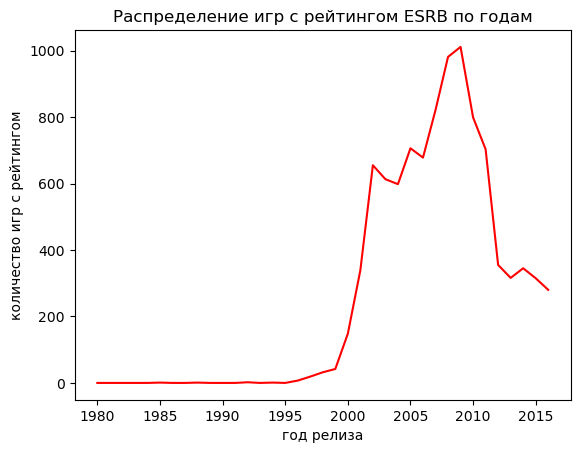

In [19]:
# построение линейного графика зависимости наличия рейтинга ESRB и года
sns.lineplot(x = data_rating.index, y = 'rating', 
             data = data_rating, color='red')
plt.xlabel('год релиза')
plt.ylabel('количество игр с рейтингом')
plt.title('Распределение игр с рейтингом ESRB по годам')
plt.show()


*Мы видим, что пропуски есть в 6 столбцах:*
- столбец **name** - столбец с именем игры, это категориальные данные. Доля пропусков составила менее 1%, это всего 2 строки, к тому же заполнить данный столбец будет некорректным решением. Медиана, среднее, мода здесь не подходят, а пропуск будет искажать результат анализа. Самым разумным решением будет удалить строки, имеющие пропущенное значение в данном столбце.  
  **Причины пропусков**. Эти пропуски есть у игр 1993 года, возможно, это одна и та же игра без официального названия, или название просто забыли указать при заведении данных. В принципе эти две строки имеют пропуски почти во всех столбцах.
- столбец **genre** - столбец с жанром игры. Аналогичная ситуация. Доля пропусков составила менее 1% и приходится на те же 2 строки. Невозможно заполнить пропуски каким-либо значением, т.к. для этого должна быть информация об названии игры. Так же удаляем строки с пустыми значениями. 
  **Причины пропусков.** Возможно, эти строки имеют столь большое количество пропусков по причине того, что их пропустили/забыли заполнить, или данные не были сохранены, некорректно выгружены из-за внутреннего сбоя. 
- **year_of_release** - год релиза игры. Доля пропусков составила около 1.6%. Заполнять пропуски на основе медианы или среднего будет нелогично, к тому же релиз игры на разных платформах может иметь большой временной разброс. Удалять строки не стоит, так как в них есть ценные данные по другим столбцам, которые и так имеют около 50% пропусков. Удалив строки, мы сократим объем значений, с которыми мы можем работать. Заполним пропуски заглушкой, значением "9999", чтобы мы могли поменять тип данных в столбце.   
  **Причины пропусков.** Пропуск в данном столбце мог возникнуть из-за того, что при заполнении данных об игре забыли указать или точная дата выхода игры точно не определена. 
- **critic_score, user_score** - оценка критиков и пользователей соответственно. Доля пропусков очень велика - более 50%. Удалять такой срез нельзя ни в коем случае. Данные столбцы важны для дальнейшего анализа, поэтому заполнять их медианным или средним значением неразумно, так как рейтинг на разных платформах может отличаться.  Чтобы избежать искажения результатов исследования, так как любое заполнение - случайное число, заполним столбцы заглушкой, то есть -1, так мы получим отдельную группу для исследования. 
- **rating** - возрастной рейтинг. Столбец также имеет высокую долю пропусков - около 40.5%. Удалять срез нельзя. Заполнение также исказит результаты анализа, поэтому поставим заглушку - 'no rating'. 
  **Причина пропусков**. ESRB была образована в 1994, а игры в данных представлены, начиная с 1980г. То есть до 1994г. игры не имели возрастного рейтинга. С созданием организации в 1994г. мы видим начало роста числа игр, имеющих возрастную категорию.

In [20]:
# удаление строк с пропусками в  name и genre
data.dropna(subset=['name', 'genre'], inplace=True)

In [21]:
# заполнение пропусков в столбце rating
data['rating'] = data['rating'].fillna('no rating')

data['rating'].unique()

array(['e', 'no rating', 'm', 't', 'e10+', 'ao', 'ec', 'rp'], dtype=object)

In [22]:
# заполнение пропусков в столбцах year_of_release, critic_score, user_score
def fill_gaps(column, value):
    data[column] = data[column].fillna(value)
    
fill_gaps('year_of_release', 9999)
fill_gaps('critic_score', -1)
fill_gaps('user_score', -1)

In [23]:
print(data['year_of_release'].unique())
print(data['critic_score'].unique())
data['user_score'].unique()

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000. 9999. 1995. 1991. 1981. 1987.
 1980. 1983.]
[76. -1. 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]


array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [24]:
# определение доли пропусков после обработки
pd.DataFrame(round(data.isna().mean()*100, 2)).\
           style.background_gradient('coolwarm')

*Так мы обработали пропуски в столбцах, удалили две строки без искажения данных. Пропуски заполнили заглушкой. Их мы исследуем отдельно. Теперь можно изменить тип данных в столбцах.*

### Изменение типов данных

In [25]:
# изменение типа данных в столбцах year_of_release и user_score
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = data['user_score'].astype('float')
data['critic_score'] = data['critic_score'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


*Тип данных в столбцах успешно изменен.  
Теперь исследуем данные на дубликаты.*

### Устранение дубликатов

In [26]:
# поиск явных дубликатов
data.duplicated().sum()

0

In [27]:
# поиск дубликатов
data.loc[data.duplicated(subset=['name', 'platform', 'year_of_release'],
                         keep=False)]

name platform  year_of_release   genre  na_sales  eu_sales  \
604    madden nfl 13      ps3             2012  sports      2.11      0.22   
16230  madden nfl 13      ps3             2012  sports      0.00      0.01   

       jp_sales  other_sales  critic_score  user_score rating  
604         0.0         0.23            83         5.5      e  
16230       0.0         0.00            83         5.5      e

In [28]:
# удаление дубликата
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'],
                         keep='first')

*Дубликаты в данных обработаны.*

### Подсчет суммарных продаж

In [29]:
# подсчет суммарных продаж во всех регионах и создание столбца total_sales
data['total_sales'] = \
      data['na_sales']\
    + data['eu_sales']\
    + data['jp_sales']\
    + data['other_sales']\

data.head()

name platform  year_of_release         genre  na_sales  \
0                wii sports      wii             2006        sports     41.36   
1         super mario bros.      nes             1985      platform     29.08   
2            mario kart wii      wii             2008        racing     15.68   
3         wii sports resort      wii             2009        sports     15.61   
4  pokemon red/pokemon blue       gb             1996  role-playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score     rating  \
0     28.96      3.77         8.45            76         8.0          e   
1      3.58      6.81         0.77            -1        -1.0  no rating   
2     12.76      3.79         3.29            82         8.3          e   
3     10.93      3.28         2.95            80         8.0          e   
4      8.89     10.22         1.00            -1        -1.0  no rating   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

### Вывод после предобработки данных: 

<p></p>

<div style="border:solid pink 5px; padding: 20px">
<li>Были обработаны имена столбцов: приведены к одному стилю.</li>
<li>Данные содержали пропуски, которые затронули 6 столбцов. В трех столбцах пропуски не были заполнены, так как заполнение исказило бы дальнейший анализ, поэтому были поставлены заглушки. Это столбцы с рейтингами, возрастной категорией и годом релиза. К тому же, эти параметры трудны в заполнении, велика возможность исказить реальную картину. Две строки были удалены, так как их доля составила менее 1% от общего объема данных и эти строки были практически пусты и неинформативны. </li>
<li>В колонке, где по смыслу могут быть только целочисленные значения (год релиза игры), был изменен тип данных на int, а также столбец с пользовательским рейтингом приведен к удобному для дальнейших исследований формату - float.</li>
<li>Явных дубликатов в данных нет.</li>
</div> 

In [30]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16712 non-null  int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     16712 non-null  int64  
 9   user_score       16712 non-null  float64
 10  rating           16712 non-null  object 
 11  total_sales      16712 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.7+ MB


## Анализ данных 

### Релиз и год выпуска

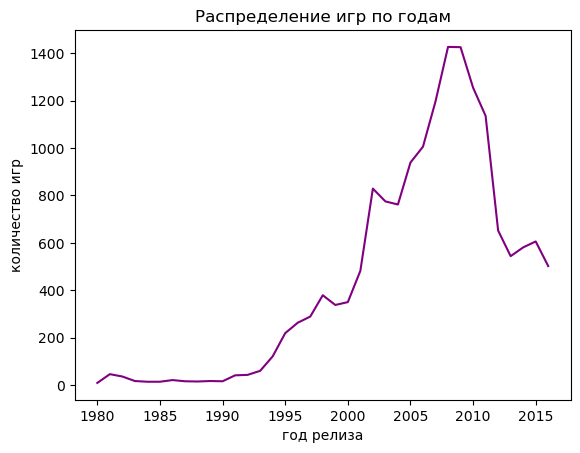

In [31]:
# создание сводной таблицы количества выпущенных игр по годам
game_count_year = data[data['year_of_release'] != 9999].\
     pivot_table(index = 'year_of_release', values='name', aggfunc='count')

# переименование столбца
game_count_year.columns = ['count']

# построение линейного графика 
sns.lineplot(x = game_count_year.index, 
             y = 'count', data = game_count_year, color='purple')
plt.xlabel('год релиза')
plt.ylabel('количество игр')
plt.title('Распределение игр по годам')
plt.show()

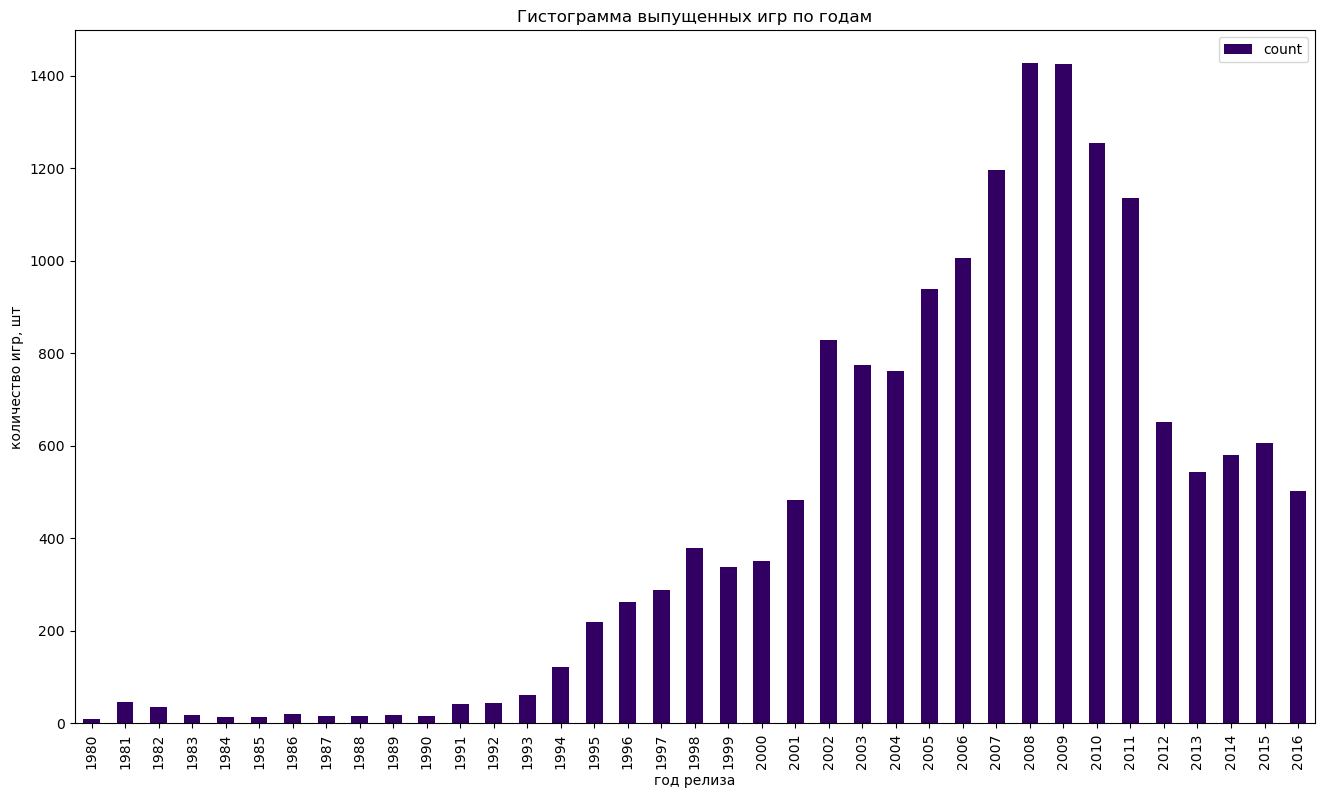

In [32]:
# построение столбчатой диограммы
game_count_year.plot(kind='bar',stacked=True, 
                     figsize=(16,9), color='#310062')
plt.title('Гистограмма выпущенных игр по годам')
plt.xlabel('год релиза')
plt.ylabel('количество игр, шт');


In [33]:
# вывод годов с наибольшим и наименьшим числом выпущенных игр
print(game_count_year.sort_values(by='count').head(5))
print(game_count_year.sort_values(by='count', ascending=False).head(5))

                 count
year_of_release       
1980                 9
1984                14
1985                14
1988                15
1990                16
                 count
year_of_release       
2008              1427
2009              1426
2010              1255
2007              1197
2011              1136


*На графиках достаточно хорошо видно, как количество выпущенных игр менялось с годами. Данные сводной таблицы демонстрируют конкретные значения по годам.  
С 1980 по 1990 игр практически не выпускалось. Затем отмечается постепенный рост числа выпущенных игр.  
Пик приходится на 2008 и 2009гг. В эти годы игр было выпущено больше всего. В общем и целом чаще всего игры выпускались в 2007-2011гг.  
В 2012г. мы видим резкий спад данного показателя.  
Распределение ассиметричное, есть скошенность влево, так как мы видим длинный хвост в начале графика.*

In [34]:
# создание сводной по годам, платформам и числу выпущенных игр
games_years_platform = data[data['year_of_release'] != 9999].\
                               pivot_table(index = 'platform', 
                                columns = 'year_of_release', 
                                values = 'name', 
                                aggfunc='count',
                                fill_value=0,
                                margins=True
                               ).reset_index()
# вывести все столбцы таблицы
pd.set_option('display.max_columns', None)
games_years_platform

year_of_release platform  1980  1981  1982  1983  1984  1985  1986  1987  \
0                   2600     9    46    36    11     1     1     2     6   
1                    3do     0     0     0     0     0     0     0     0   
2                    3ds     0     0     0     0     0     0     0     0   
3                     dc     0     0     0     0     0     0     0     0   
4                     ds     0     0     0     0     0     1     0     0   
5                     gb     0     0     0     0     0     0     0     0   
6                    gba     0     0     0     0     0     0     0     0   
7                     gc     0     0     0     0     0     0     0     0   
8                    gen     0     0     0     0     0     0     0     0   
9                     gg     0     0     0     0     0     0     0     0   
10                   n64     0     0     0     0     0     0     0     0   
11                   nes     0     0     0     6    13    11    19    10   
12                    ng     0     0     0     0     0     0     0     0   
13                    pc     0     0     0     0     0     1     0     0   
14                  pcfx     0     0     0     0     0     0     0     0   
15                    ps     0     0     0     0     0     0     0     0   
16                   ps2     0     0     0     0     0     0     0     0   
17                   ps3     0     0     0     0     0     0     0     0   
18                   ps4     0     0     0     0     0     0     0     0   
19                   psp     0     0     0     0     0     0     0     0   
20                   psv     0     0     0     0     0     0     0     0   
21                   sat     0     0     0     0     0     0     0     0   
22                   scd     0     0     0     0     0     0     0     0   
23                  snes     0     0     0     0     0     0     0     0   
24                  tg16     0     0     0     0     0     0     0     0   
25                   wii     0     0     0     0     0     0     0     0   
26                  wiiu     0     0     0     0     0     0     0     0   
27                    ws     0     0     0     0     0     0     0     0   
28                  x360     0     0     0     0     0     0     0     0   
29                    xb     0     0     0     0     0     0     0     0   
30                  xone     0     0     0     0     0     0     0     0   
31                   All     9    46    36    17    14    14    21    16   

year_of_release  1988  1989  1990  1991  1992  1993  1994  1995  1996  1997  \
0                   2     2     0     0     0     0     0     0     0     0   
1                   0     0     0     0     0     0     1     2     0     0   
2                   0     0     0     0     0     0     0     0     0     0   
3                   0     0     0     0     0     0     0     0     0     0   
4                   0     0     0     0     0     0     0     0     0     0   
5                   1    10     3     9     7     0     3     4     6     8   
6                   0     0     0     0     0     0     0     0     0     0   
7                   0     0     0     0     0     0     0     0     0     0   
8                   0     0     1     1     6     7    12     0     0     0   
9                   0     0     0     0     1     0     0     0     0     0   
10                  0     0     0     0     0     0     0     0    18    49   
11                 11     5     8     7     3     4     1     0     0     0   
12                  0     0     0     0     0     2     4     4     2     0   
13                  1     0     0     0     5     0     6     2     4     6   
14                  0     0     0     0     0     0     0     0     1     0   
15                  0     0     0     0     0     0    17    99   164   188   
16                  0     0     0     0     0     0     0     0     0     0   
17                  0     0     0     0     0     0     0     0     0

In [35]:
# вывод среза таблицы за последние 10 лет
games_years_platform.loc[:,
      ['platform', 2006, 2007, 2008, 2009, 
       2010, 2011, 2012, 2013, 2014, 2015, 2016]]

year_of_release platform  2006  2007  2008  2009  2010  2011  2012  2013  \
0                   2600     0     0     0     0     0     0     0     0   
1                    3do     0     0     0     0     0     0     0     0   
2                    3ds     0     0     0     0     0   116    93    91   
3                     dc     0     1     1     0     0     0     0     0   
4                     ds   201   376   492   403   323   153    23     8   
5                     gb     0     0     0     0     0     0     0     0   
6                    gba    39     6     0     0     0     0     0     0   
7                     gc    40     4     0     0     0     0     0     0   
8                    gen     0     0     0     0     0     0     0     0   
9                     gg     0     0     0     0     0     0     0     0   
10                   n64     0     0     0     0     0     0     0     0   
11                   nes     0     0     0     0     0     0     0     0   
12                    ng     0     0     0     0     0     0     0     0   
13                    pc    52    62    76   107    90   139    61    38   
14                  pcfx     0     0     0     0     0     0     0     0   
15                    ps     0     0     0     0     0     0     0     0   
16                   ps2   259   214   191    96    38     7     0     0   
17                   ps3    27    90   138   162   181   215   147   126   
18                   ps4     0     0     0     0     0     0     0    16   
19                   psp   189   133   100   161   188   139   106    54   
20                   psv     0     0     0     0     0    18    53    63   
21                   sat     0     0     0     0     0     0     0     0   
22                   scd     0     0     0     0     0     0     0     0   
23                  snes     0     0     0     0     0     0     0     0   
24                  tg16     0     0     0     0     0     0     0     0   
25                   wii    44   185   282   325   253   143    31    12   
26                  wiiu     0     0     0     0     0     0    32    42   
27                    ws     0     0     0     0     0     0     0     0   
28                  x360    93   123   146   172   182   206   106    75   
29                    xb    62     3     1     0     0     0     0     0   
30                  xone     0     0     0     0     0     0     0    19   
31                   All  1006  1197  1427  1426  1255  1136   652   544   

year_of_release  2014  2015  2016  
0                   0     0     0  
1                   0     0     0  
2                  80    86    46  
3                   0     0     0  
4                   0     0     0  
5                   0     0     0  
6                   0     0     0  
7                   0     0     0  
8                   0     0     0  
9                   0     0     0  
10                  0     0     0  
11                  0     0     0  
12                  0     0     0  
13                 47    50    54  
14                  0     0     0  
15                  0     0     0  
16                  0     0     0  
17                108    73    38  
18                 75   137   164  
19                 10     3     0  
20                100   110    85  
21                  0     0     0  
22                  0     0     0  
23                  0     0     0  
24                  0     0     0  
25                  6     4     1  
26                 31    28    14  
27                  0     0     0  
28                 63    35    13  
29                  0     0     0  
30                 61    80    87  
31                581   606   502

In [36]:
# вывод среза сводной таблицы по количеству выпущенных игр в зависимости от платформы
games_years_platform[['platform','All']].\
          sort_values(by='All', ascending=False).head(10)

year_of_release platform    All
31                   All  16443
16                   ps2   2127
4                     ds   2121
17                   ps3   1305
25                   wii   1286
28                  x360   1232
19                   psp   1193
15                    ps   1190
13                    pc    957
6                    gba    811

*Было рассмотрено, как меняется число выпущенных игр с годами в разрезе платформ. 
Чаще всего игры выпускали для PS2 и PS3(Sony), DS и Wii(Nintendo), X360(Microsoft).
Можно отметить, что при появлении новой платформы, производители продолжали выпускать и поддерживать игры для устаревшей. Так было с PS2 и PS3. Но когда в 2013г. выпустили PS4, релиз игр для PS2 прекратился.  
Возьмем срез с 2006 года. В данных присутствуют платформы, для которых в течение 10 лет не было выпущено ни одной игры, есть платформы, для которых активно разрабатывают игры, а есть новые платформы, для которых разработка игр началась не так давно.*

<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
    Наибольшее количество игр было выпущено в период с 2002-го по 2011-й годы. В 2012г. был спад числа игр. И приблизительно остается на том же уровне до 2016г. Хотя отмечаются скачки и спады, конечно. Но сильных выбросов в <b>2012-2016гг.</b> не отмечается.<br>
    Нашей задачей является выявление закономерностей, определяющих успешность продукта, чтобы сделать упор на него в 2017г. Поэтому стоит обратить внимание на активные платформы, для которых производители продолжают выпускать игры, или хоть раз выпустили игру за последние 10 лет. Это такие платформы, как: 3ds, dc, ds, gba, gc, pc, ps2, ps3, ps4, psp, psv, wii, wiiu, x360, xb, xone. Чаще всего выпускались игры для <b>PS2 и PS3(Sony), DS и Wii(Nintendo), X360(Microsoft)</b>.<br>	
</div>

### Продажи и платформы

In [37]:
# создание сводной таблицы количества продаж по платформам
game_sales_platform = data.pivot_table(index = 'platform',
                                       values='total_sales', 
                                       aggfunc='sum')

# переименование столбца
game_sales_platform.columns = ['sum']

# сортировка по уменьшению
game_sales_platform.sort_values(by='sum', ascending=False, inplace=True)

game_sales_platform.head(10)


sum
platform         
ps2       1255.77
x360       971.42
ps3        939.64
wii        907.51
ds         806.12
ps         730.86
gba        317.85
ps4        314.14
psp        294.05
pc         259.52

*Мы вывели топ-10 платформ с наибольшими суммарными продажами за все время.  
Платформы с наибольшими продажами - это ps2, x360, ps3, wii, ds, ps. Построим для них график распределения по годам.*

In [38]:
# создание сводной таблицы с годом, платформой и суммой продаж
data_sales_platform_year = data[data['year_of_release'] != 9999].\
    pivot_table(
    index = 'year_of_release', 
    columns = 'platform',
    values = 'total_sales', 
    aggfunc = 'sum'
    )

# срез данных топ-5 платформ
game_sales_platform_top = data_sales_platform_year[['ps2', 'x360','ps3',
                                                    'wii', 'ds', 'ps']]




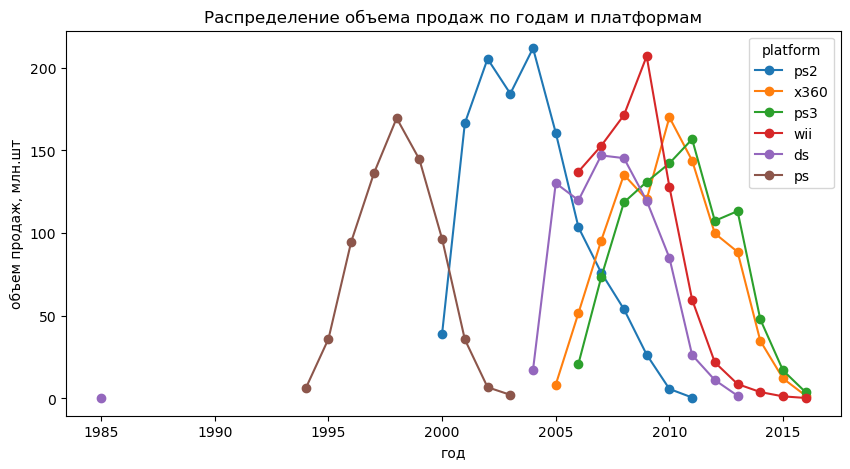

In [39]:
# создание диаграммы распределения по годам по платформам с наибольшими продажами
game_sales_platform_top.plot(style = '-o', figsize=(10, 5));

plt.xlabel('год')
plt.ylabel('объем продаж, млн.шт')
plt.title('Распределение объема продаж по годам и платформам')
plt.show()

*На графике видно срок жизни платформ.    
PS - с 1994г. до 2003г., 9 лет;  
PS2 - с 2000г. до 2011г. - 11 лет;  
PS3 - с 2006г. по настоящее время. но на нее сильно повлиял выход PS4 в 2013г.;  
DS - с 2004г. до 2013г. - 9 лет;  
Wii - с 2006 по настоящее время, но в 2012г. активность начала падать, а с 2014г. почти никакой активности не наблюдается и так до 2016г. - 10 лет;  
X360 - с 2005 по 2016г. - 11 лет.  
Таким образом, в среднем платформа живет 10 лет. За 2016г. данные неполные, поэтому на графике есть спад продаж на всех платформах в 2016 году.*

*На графике заметен выброс в 1985 году у платформы ds, хотя консоль была выпущена в 2004 году.*

In [40]:
# срез строки
data.query('year_of_release==1985 and platform=="ds"')

name platform  year_of_release   genre  \
15957  strongest tokyo university shogi ds       ds             1985  action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
15957       0.0       0.0      0.02          0.0            -1        -1.0   

          rating  total_sales  
15957  no rating         0.02

По этой строке практически нет никаких ценных данных. Удалим ее.

In [41]:
# удаление строки с выбросом в 1985г по платформе ds
data.drop(data[(data['year_of_release'] == 1985) & (data['platform']=="ds")].\
          index, inplace=True)

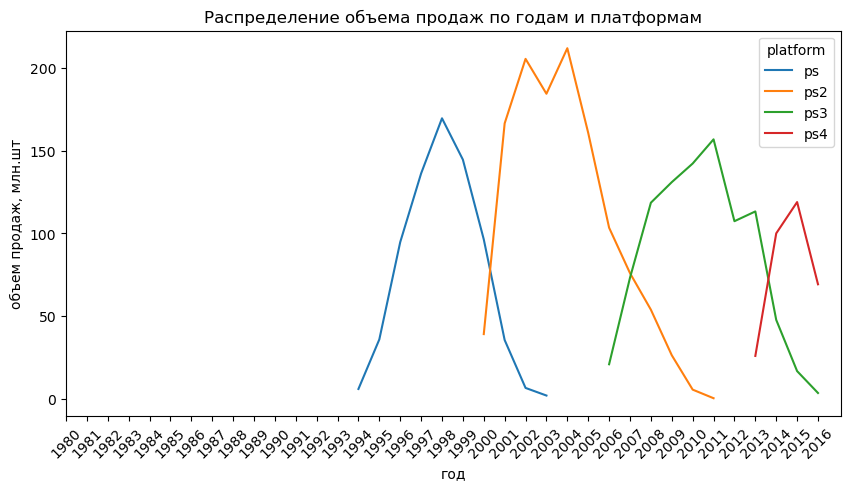

In [42]:
# создание диаграммы распределения продаж по годам на платформе sony playstation
data_sales_platform_year[['ps', 'ps2','ps3', 'ps4']].\
    plot(xticks=game_sales_platform_top.index, figsize=(10, 5), rot=45)
plt.xlabel('год')
plt.ylabel('объем продаж, млн.шт')
plt.title('Распределение объема продаж по годам и платформам')
plt.show()

*Для наглядности рассмотрели, как падает активность платформ при выходе новой консоли. В среднем консоль 'умирает' через 4-5 лет после выхода новой версии платформы. Так в 2013г. вышла PS4, поэтому в 2016-2017г. вероятно PS3 будет постепенно приостановливать поддержку. Так Северной Америке поддержка уже прекращена в октябре 2016г.*

<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
    Таким образом, срок жизни одной платформы равен примерно 10 годам. Каждые 4-5 лет компании стараются обновлять свою консоль, чтобы платформа соответствовала техническим требованиям вновь выпущенных игр.<br>  
    Платформами с наибольшими суммарными продажами за все время оказались ps2, x360, ps3, wii, ds, ps.<br>	
</div>

### Выбор актуального периода

**Актуальным периодом, который послужит основой для прогноза на 2017г., будем считать 2014-2016г., то есть 3 года.**  
Так как игровой рынок весьма динамичен, быстро меняются механизмы распространения игр, возникают новые тенденции, изменяются приоритеты пользователей и популярность разных платформ.

In [43]:
# создание выборки с актуальным периодом(2014-2016гг.)
game = data.query('year_of_release > 2013 and year_of_release !=9999')

# проверка
game['year_of_release'].unique()

array([2015, 2014, 2016])

### Динамика продаж на платформах 

*Мы определились с глубиной исследования. Теперь посмотрим на платформы, как они себя ведут в этом временном диапазоне.*

In [44]:
# создание сводной таблицы
game_sales_actual = game.pivot_table(
    index = 'year_of_release', 
    columns = 'platform',
    values = 'total_sales', 
    aggfunc = 'sum'
    ) 

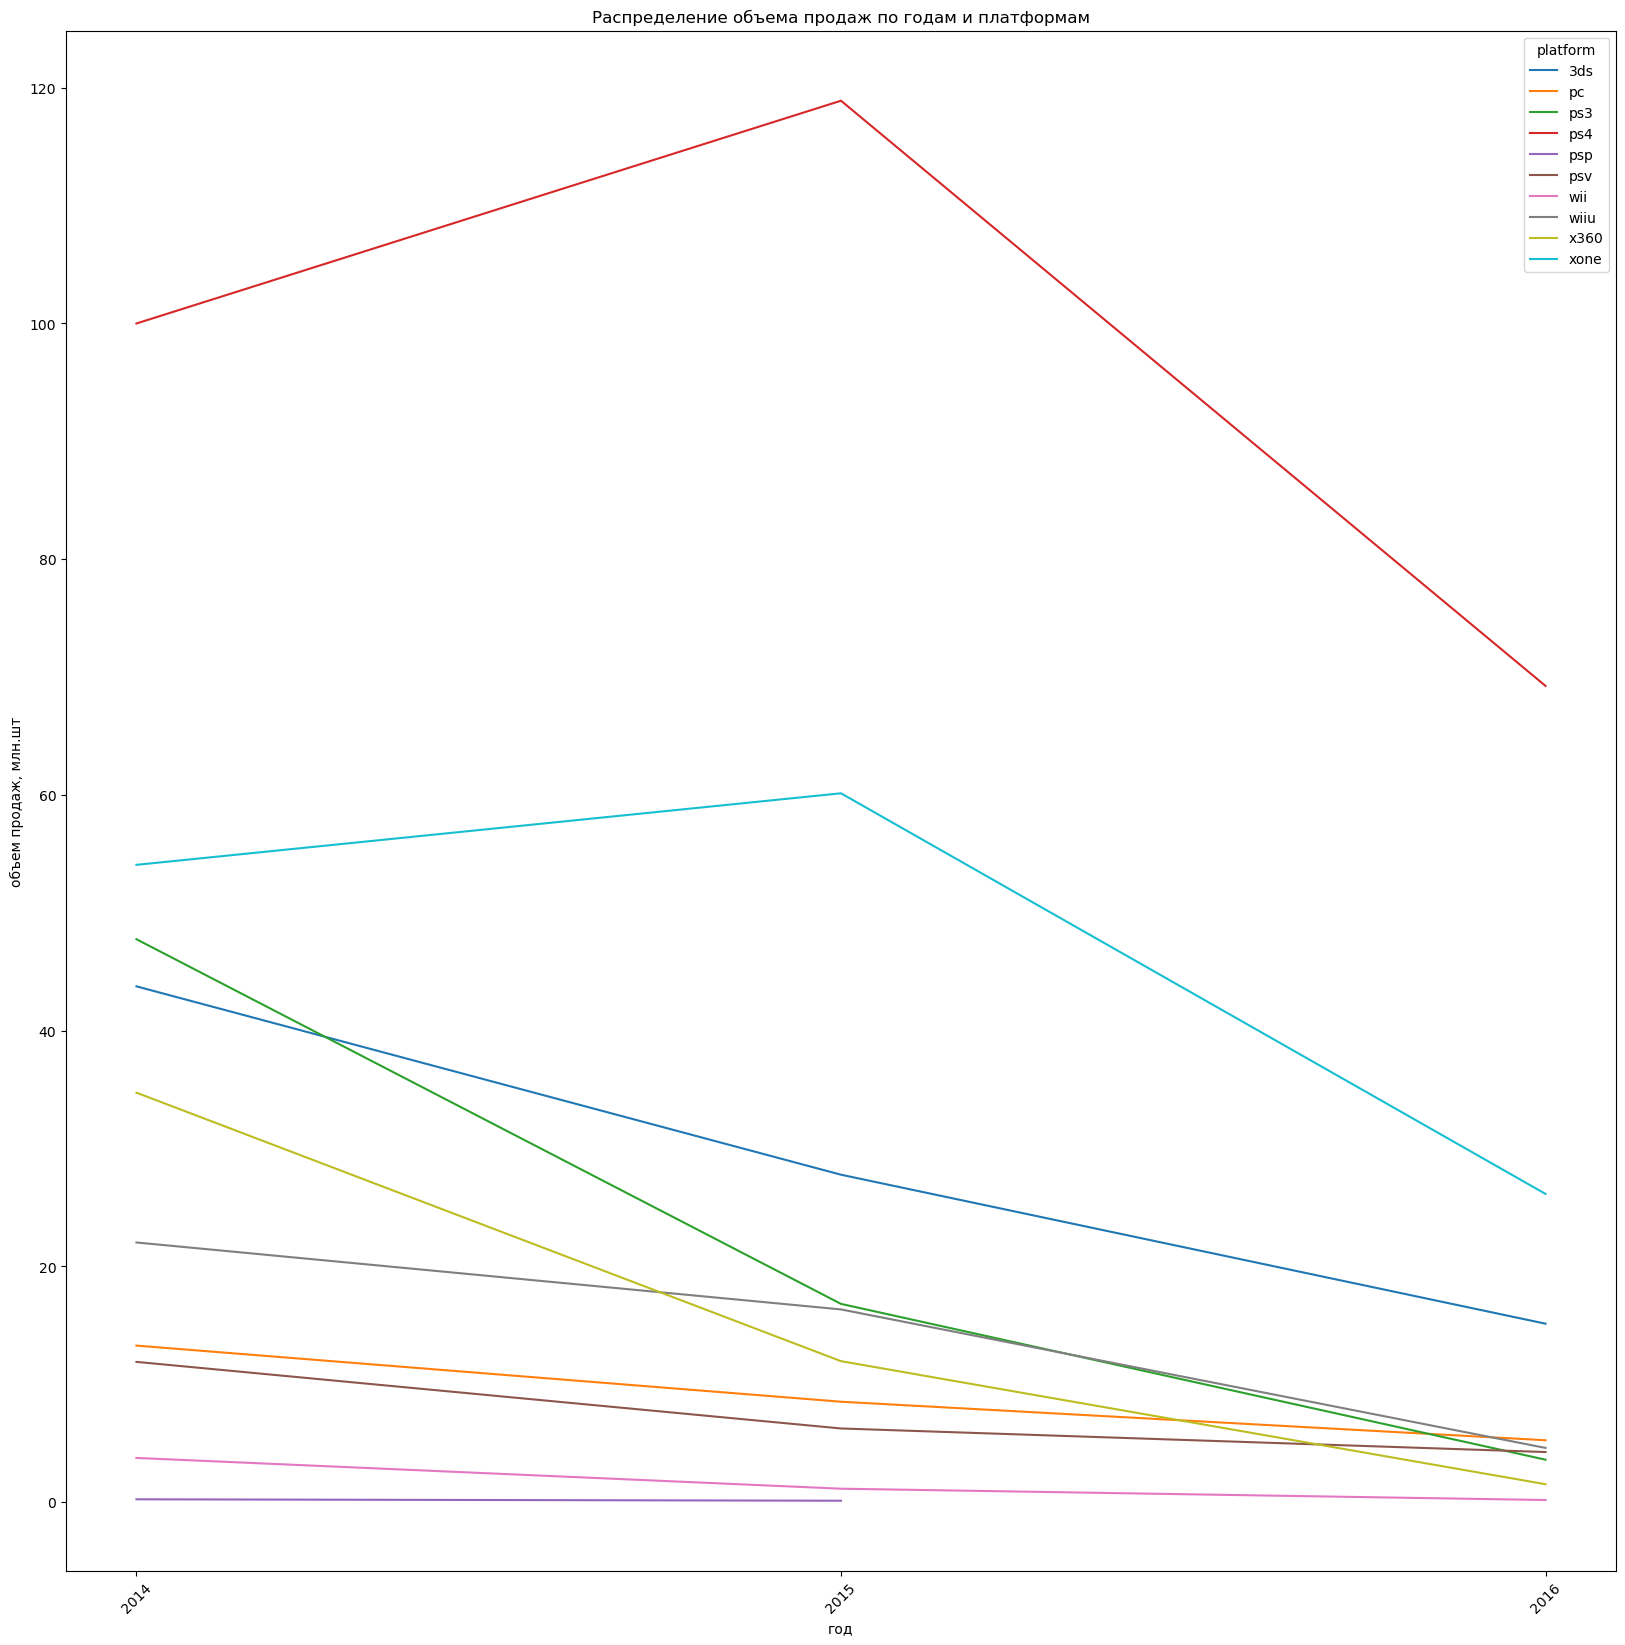

In [45]:
# построение графика распределения продаж на платформах в актуальном периоде
game_sales_actual.plot(xticks=game_sales_actual.index, 
                       figsize=(20, 20), rot=45)
plt.xlabel('год')
plt.ylabel('объем продаж, млн.шт')
plt.title('Распределение объема продаж по годам и платформам')
plt.show()

<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
    На графике видно, что <b><span style="color:#de3163">лидерами продаж</span></b> на конец 2016 года являются такие платформы, как <b>PlayStation4,  Xbox One и Nintendo 3DS</b>. Первые две вышли на рынок около 3 лет назад, поэтому сейчас постепенно приближаются к своему пику. Nintendo 3DS выпущена в 2011г., она прошла свой пик, но еще будет держаться на хороших позициях на рынке, около 4-5 лет.<br>
    Также в <b><span style="color:#de3163">рекомендацию</span></b> можно включить игры для таких консолей, как <b>PC и PSV(PS Vita)</b>.<br> 
Платформы <b>Wii U, Xbox 360 и PlayStation 3</b> постепенно <b><span style="color:#de3163">теряют объемы продаж</span></b>, отметим динамику спада, но еще какое-то время платформы останутся на рынке.<br>  
Остальные платформы упали в продажах, сняты с производства или будут сняты с ближайшее время, поэтому в 2017г. их оживление маловероятно.<br>
</div>

### График глобальных продаж на платформах 

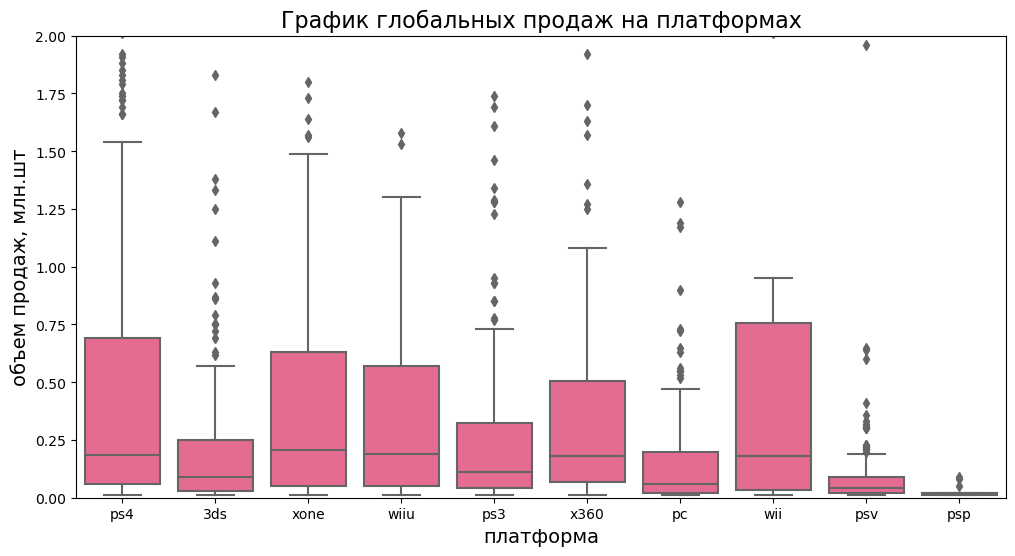

In [46]:
# построение ящиков с усами по продажам на разных платформах
plt.figure(figsize=(12,6)) 
sns.boxplot(x='platform', y='total_sales', data=game, color='#F85888').\
           set_title("График глобальных продаж на платформах", fontsize=16) 
plt.xlabel('платформа', fontsize=14)
plt.ylabel('объем продаж, млн.шт', fontsize=14)
plt.ylim(0,2)
plt.show()

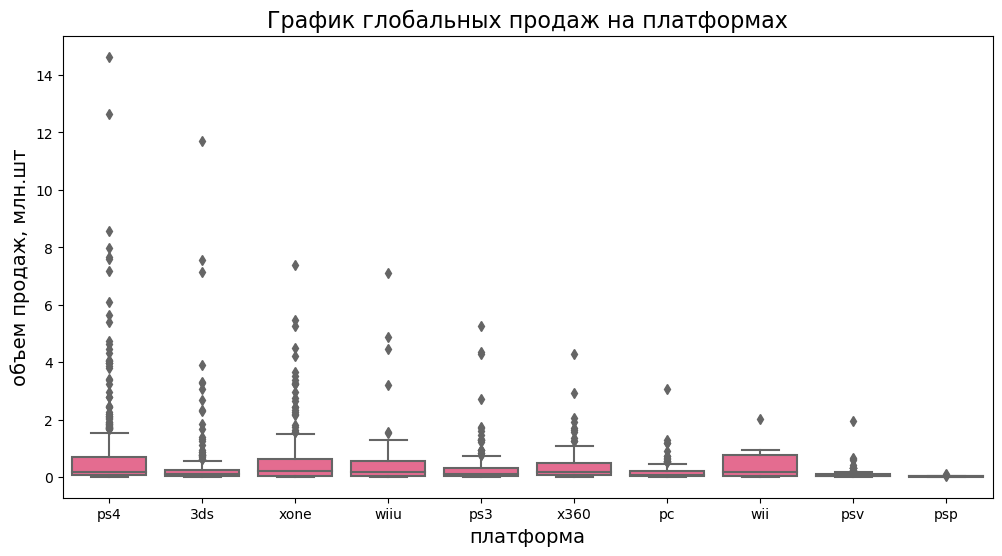

In [47]:
# построение ящиков с усами по продажам на разных платформах с 100% масштабом
plt.figure(figsize=(12,6)) 
sns.boxplot(x='platform', y='total_sales', data=game, color='#F85888').\
           set_title("График глобальных продаж на платформах", fontsize=16) 
plt.xlabel('платформа', fontsize=14)
plt.ylabel('объем продаж, млн.шт', fontsize=14)
plt.show()

<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
    Медианы игр на платформах PS4, XOne, WII U, X360 и WII практически равны. Игры, выпущенные для этих платформ, хорошо и успешно продаются. Медиана продаж игр на платформе XOne самая высокая, что говорит о том, что здесь представлено больше игр с высокими продажами.<br>
    Самая стабильная платформа - WII. Она имеет самый широкий ряд популярных и наиболее продаваемых игр. Следом идут PS4, XOne, WII U, X360. Игры, выпущенные на этих платформах также весьма успешно продаются и стабильно привлекают игроков.<br>
    Стоит отметить PS4. На этой платформе есть много выбросов, она лидер, то есть для нее было выпущено много игр-бестселлеров, рекордсменов. Одну из таких игр продали более 14млн. раз. Следом идет платформа 3DS.<br>
    Также на платфрмах PS4, XOne, WII U и 3DS есть много игр-выбросов с уровнем продаж от 6-9млн.экземпляров. Значит, на этих платформах много игр, которые принесли максимум выручки. Т.е. платформы PS4, XOne, WII U и 3DS способны предложить наиболее привлекательные для игроманов игры. <br>
    На платформе 3DS основная линейка игр не отличается широким спросом и популярностью, но при этом на платформе часто можно встретить игры-рекордсмены с огромным объемом продаж и популярностью.<br>
    Самые узкие ящики у платформ - psv, psp - здесь вариативность признака меньше всего, разница между высоким объемом продаж и низким невелика, медианы самые маленькие из всех платформ, то есть игры на этих платформах не пользуются популярностью у игроманов. При этом на psv выпущены игры-бестселлеры, так как присутствуют выбросы.<br>
   У платформы psp отсутствует нижний ус и медиана почти равна 1 квартилю, это самый узкий ящик из всех представленных, аномальных значений очень мало, то есть на этой платформе игры не приносит значительный доход. Значит, на этой платформе игры продавались не слишком часто и в небольшом количестве.<br>
</div>

### Влияние отзывов на продажи внутри платформ

In [48]:
# создание сводной таблицы по объему проданных игр внутри платформ
game_platform = game.pivot_table(index='platform', 
                                 values='total_sales', 
                                 aggfunc='sum').\
      sort_values(by='total_sales')

In [49]:
# создание сводной таблицы по оценкам платформ критиков и пользователей
game_scores = game.query('user_score != -1 and critic_score != -1').\
       groupby('platform').\
       agg({'critic_score':'mean', 'user_score':'mean'}).\
       merge(game_platform, on='platform').\
       sort_values(by='total_sales')
game_scores

critic_score  user_score  total_sales
platform                                       
psv          72.301887    7.871698        22.40
pc           76.286957    6.341739        27.05
wiiu         71.071429    7.226190        42.98
x360         63.730769    6.142308        48.22
ps3          66.555556    6.330556        68.18
3ds          70.191489    7.314894        86.68
xone         74.125828    6.620530       140.36
ps4          72.209402    6.832479       288.15

*Самой популярной платформой стала PS4, чаще всего покупали игры для этой платформы, а вот реже всего пользователи интересовались играми для PS V.  
При этом выше всего критики оценили платформу - PC - на 76, но уровень продаж игр для нее на предпоследнем месте. Следом идет XOne, ее критики оценили на 74.  
Предварительно сложно проследить зависимость оценок и уровня продаж, обратимся за помощью к коэффициенту корреляции и диаграмме рассеяния. Посмотрим, как на продажи влияют оценки критиков и пользователей.*

#### PS4

In [50]:
# выборка платформы ps4
games_ps4 = game[game['platform'] == 'ps4']

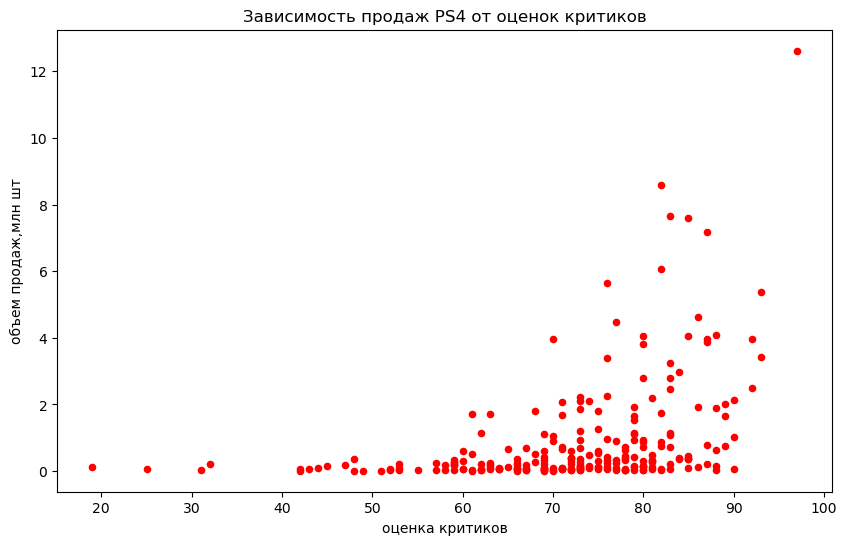

In [51]:
# создание диаграммы рассеяния для платформы ps4 и оценки критиков
games_ps4.query('critic_score != -1').\
    plot(kind='scatter', 
         x='critic_score', 
         y='total_sales', 
         color='red', figsize=(10,6))
plt.xlabel(
    'оценка критиков')
plt.ylabel(
    'объем продаж,млн шт')
plt.title(
    'Зависимость продаж PS4 от оценок критиков')
plt.show()


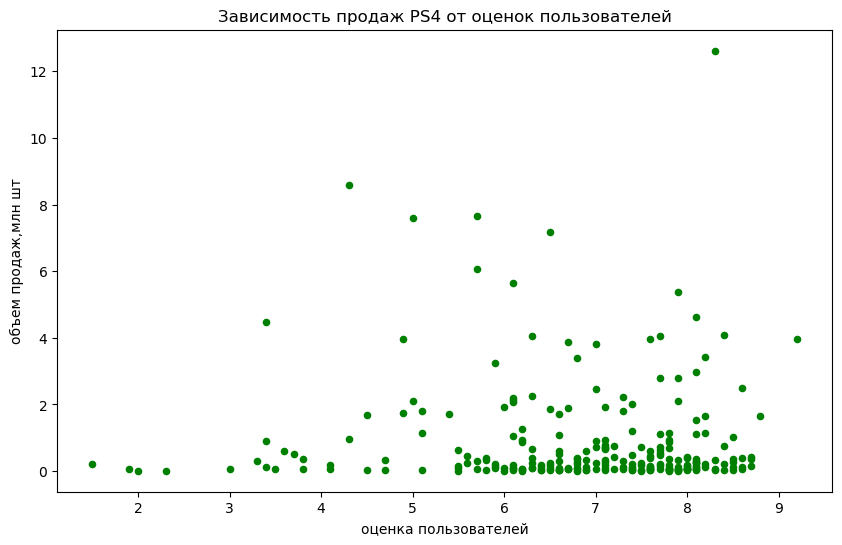

In [52]:
# построение диаграмм рассеяния для платформы ps4 и оценки пользователей
games_ps4.query('user_score != -1').\
    plot(kind='scatter', x='user_score', 
         y='total_sales', color='green', 
         figsize=(10,6))
plt.xlabel(
    'оценка пользователей')
plt.ylabel(
    'объем продаж,млн шт')
plt.title(
    'Зависимость продаж PS4 от оценок пользователей')
plt.show()

*Изучив диаграммы отметим,  что игры, имеющие рейтинг выше 70, продавались чаще и больше, чем игры с меньшим рейтингом. Среди игр с рейтингом от 80 до 90 можно встретить те, что были проданы более 8млн.раз, есть и игра с рейтингом близким к 100, проданная более 12млн.раз.  
Нельзя сказать то же самое про зависимость уровня продаж и оценки пользователей. График более хаотичен точки на графике расположены в хаотичном порядке. Заметной корреляции между признаками не наблюдается.*

In [53]:
# рассчет коэффициента корреляции объема продаж и оценки критиков и пользователей
corr_critic_ps4 = games_ps4.query('critic_score != -1')\
                  [['total_sales','critic_score']].corr()

corr_user_ps4 = games_ps4.query('user_score != -1')\
                [['total_sales','user_score']].corr()

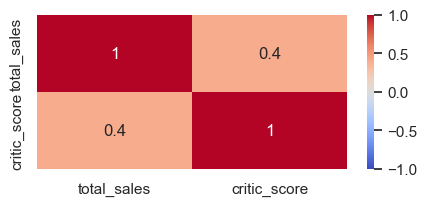

In [54]:
# построение тепловой карты корреляции объема продаж и оценки критиков
sns.set(rc = {'figure.figsize':(5,2)})
sns.heatmap(corr_critic_ps4, cmap='coolwarm', annot=True, vmax=1, vmin=-1);


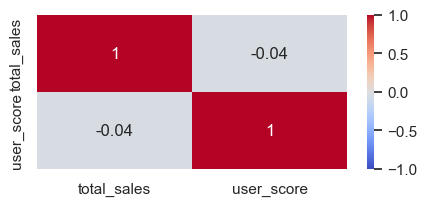

In [55]:
# построение тепловой карты корреляции объема продаж и оценки пользователей
sns.set(rc = {'figure.figsize':(5,2)})
sns.heatmap(corr_user_ps4, cmap='coolwarm', annot=True, vmax=1, vmin=-1);

*В тепловой карте представлены коэффициенты Пирсона, обозначающие силу связи между признаками. Рассмотрим их поближе.    
Изучим от каких параметров сильнее всего зависит общий объем продаж игр на платформе ps4 (чем выше коэффициент - тем выше зависимость):*  
* 0.4 - умеренная сила корреляции с оценками критиков
* -0.04  - связь с оценками пользователей практически отсутствует
Таким образом, замечена некоторая связь между оценкой критиков и уровнем продаж. А оценка пользователей практически никакого влияния не оказывает.

#### PS3

In [56]:
# выборка платформы ps3
games_ps3 = game[game['platform'] == 'ps3']

# рассчет коэффициента корреляции объема продаж и оценки критиков и пользователей
corr_user_ps3 = games_ps3.query('user_score != -1')\
           [['total_sales','user_score']].corr()

corr_critic_ps3 = games_ps3.query('critic_score != -1')\
                  [['total_sales','critic_score']].corr()


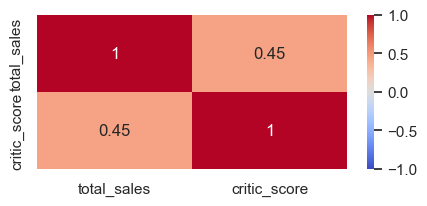

In [57]:
# построение тепловой карты корреляции объема продаж и оценки критиков
sns.set(rc = {'figure.figsize':(5,2)})
sns.heatmap(corr_critic_ps3, cmap='coolwarm', annot=True, vmax=1, vmin=-1);


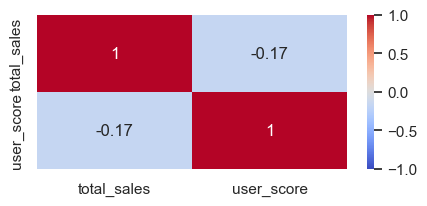

In [58]:
# построение тепловой карты корреляции объема продаж и оценки пользователей
sns.set(rc = {'figure.figsize':(5,2)})
sns.heatmap(corr_user_ps3, cmap='coolwarm', annot=True, vmax=1, vmin=-1);

* 0.45 - умеренная сила корреляции с оценками критиков  
* -0.17 - связь с оценками пользователей практически отсутствует. 

Таким образом, замечена некоторая связь между оценкой критиков и уровнем продаж. А оценка пользователей практически никакого влияния не оказывает.

#### 3DS

In [59]:
# выборка платформы 3ds
games_3ds = game[game['platform'] == '3ds']

# рассчет коэффициента корреляции объема продаж и оценки критиков и пользователей
corr_critic_3ds = games_3ds.query('critic_score != -1')\
                 [['total_sales','critic_score']].corr()

corr_user_3ds = games_3ds.query('user_score != -1')\
                [['total_sales','user_score']].corr()


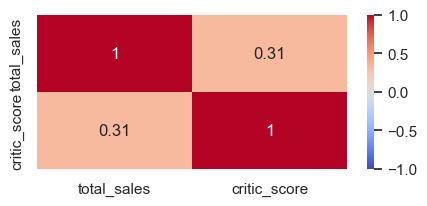

In [60]:
# построение тепловой карты корреляции объема продаж и оценки критиков
sns.set(rc = {'figure.figsize':(5,2)})
sns.heatmap(corr_critic_3ds, cmap='coolwarm', annot=True, vmax=1, vmin=-1);

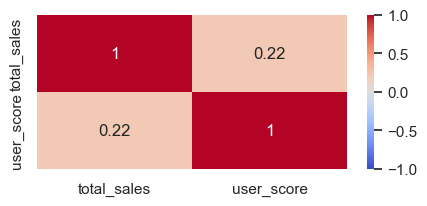

In [61]:
# построение тепловой карты корреляции объема продаж и оценки пользователей
sns.set(rc = {'figure.figsize':(5,2)})
sns.heatmap(corr_user_3ds, cmap='coolwarm', annot=True, vmax=1, vmin=-1);

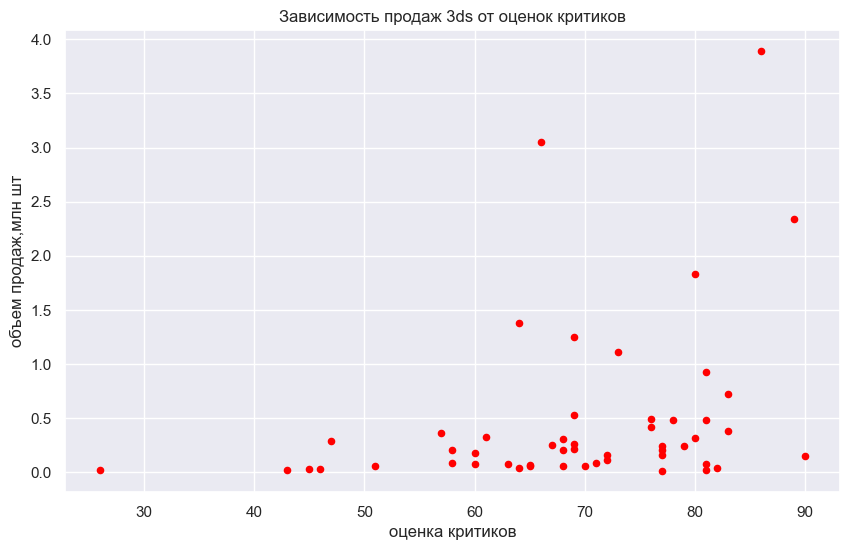

In [62]:
# создание диаграммы рассеяния для платформы 3ds и оценки критиков
games_3ds.query('critic_score != -1').\
    plot(kind='scatter', 
         x='critic_score', 
         y='total_sales', 
         color='red', figsize=(10,6))
plt.xlabel(
    'оценка критиков')
plt.ylabel(
    'объем продаж,млн шт')
plt.title(
    'Зависимость продаж 3ds от оценок критиков')
plt.show()

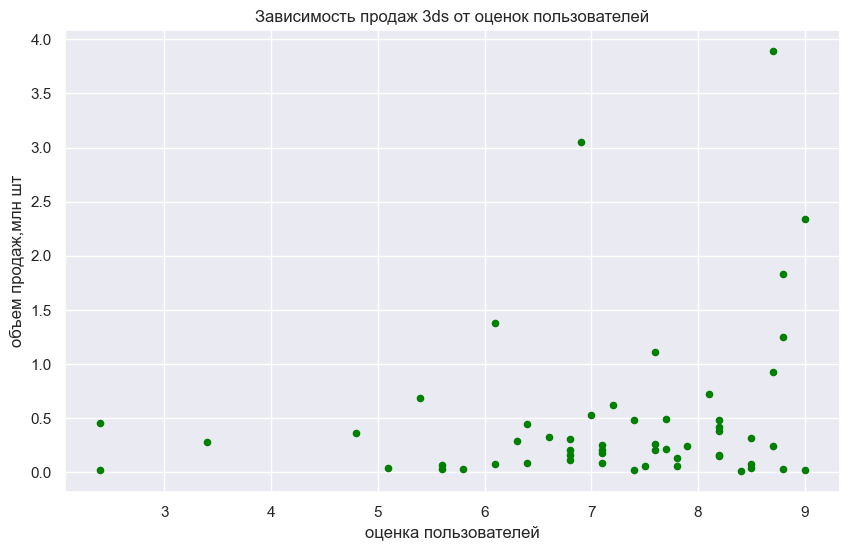

In [63]:
# построение диаграмм рассеяния для платформы 3ds и оценки пользователей
games_3ds.query('user_score != -1').\
    plot(kind='scatter', x='user_score', 
         y='total_sales', color='green', 
         figsize=(10,6))
plt.xlabel(
    'оценка пользователей')
plt.ylabel(
    'объем продаж,млн шт')
plt.title(
    'Зависимость продаж 3ds от оценок пользователей')
plt.show()

#### Xbox One 

In [64]:
# выборка платформы xone
games_xone = game[game['platform'] == 'xone']

# рассчет коэффициента корреляции объема продаж и оценки критиков и пользователей
corr_critic_xone = games_xone.query('critic_score != -1')\
                  [['total_sales','critic_score']].corr()

corr_user_xone = games_xone.query('user_score != -1')\
                [['total_sales','user_score']].corr()


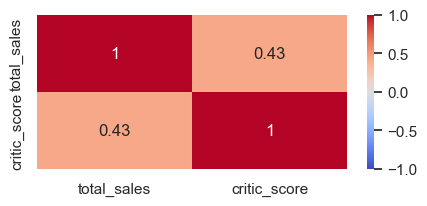

In [65]:
# построение тепловой карты корреляции объема продаж и оценки критиков
sns.set(rc = {'figure.figsize':(5,2)})
sns.heatmap(corr_critic_xone, cmap='coolwarm', annot=True, vmax=1, vmin=-1);

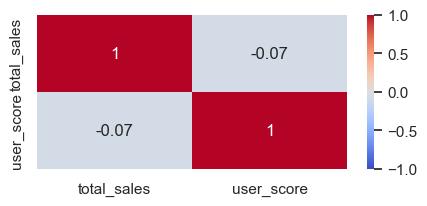

In [66]:
# построение тепловой карты корреляции объема продаж и оценки пользователей
sns.set(rc = {'figure.figsize':(5,2)})
sns.heatmap(corr_user_xone, cmap='coolwarm', annot=True, vmax=1, vmin=-1);

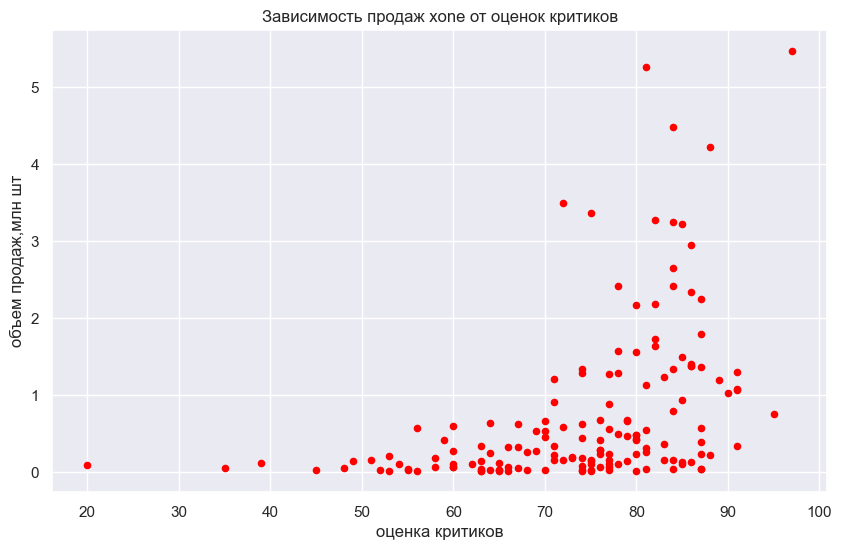

In [67]:
# создание диаграммы рассеяния для платформы xone и оценки критиков
games_xone.query('critic_score != -1').\
    plot(kind='scatter', 
         x='critic_score', 
         y='total_sales', 
         color='red', figsize=(10,6))
plt.xlabel(
    'оценка критиков')
plt.ylabel(
    'объем продаж,млн шт')
plt.title(
    'Зависимость продаж xone от оценок критиков')
plt.show()

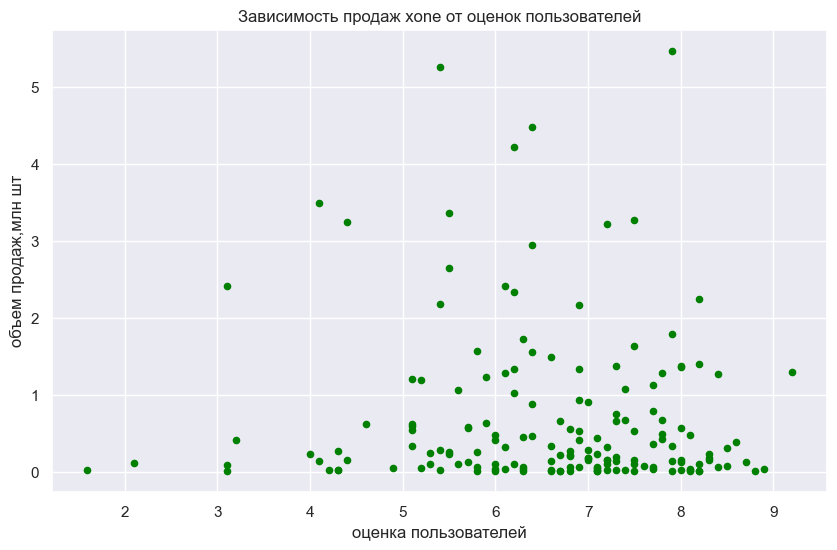

In [68]:
# построение диаграмм рассеяния для платформы xone и оценки пользователей
games_xone.query('user_score != -1').\
    plot(kind='scatter', x='user_score', 
         y='total_sales', color='green', 
         figsize=(10,6))
plt.xlabel(
    'оценка пользователей')
plt.ylabel(
    'объем продаж,млн шт')
plt.title(
    'Зависимость продаж xone от оценок пользователей')
plt.show()

#### WII U

In [69]:
# выборка платформы wiiu
games_wiiu = game[game['platform'] == 'wiiu']

# рассчет коэффициента корреляции объема продаж и оценки критиков и пользователей
corr_critic_wiiu = games_wiiu.query('critic_score != -1')\
                 [['total_sales','critic_score']].corr()

corr_user_wiiu = games_wiiu.query('user_score != -1')\
                 [['total_sales','user_score']].corr()


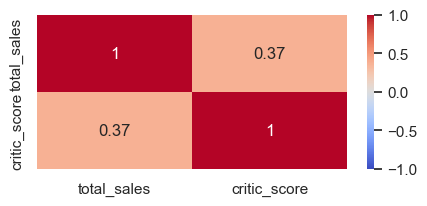

In [70]:
# построение тепловой карты корреляции объема продаж и оценки критиков
sns.set(rc = {'figure.figsize':(5,2)})
sns.heatmap(corr_critic_wiiu, cmap='coolwarm', annot=True, vmax=1, vmin=-1);

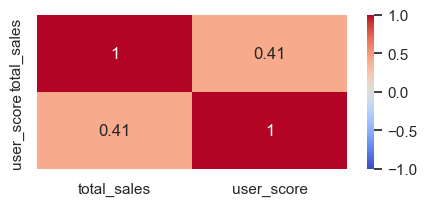

In [71]:
# построение тепловой карты корреляции объема продаж и оценки пользователей
sns.set(rc = {'figure.figsize':(5,2)})
sns.heatmap(corr_user_wiiu, cmap='coolwarm', annot=True, vmax=1, vmin=-1);

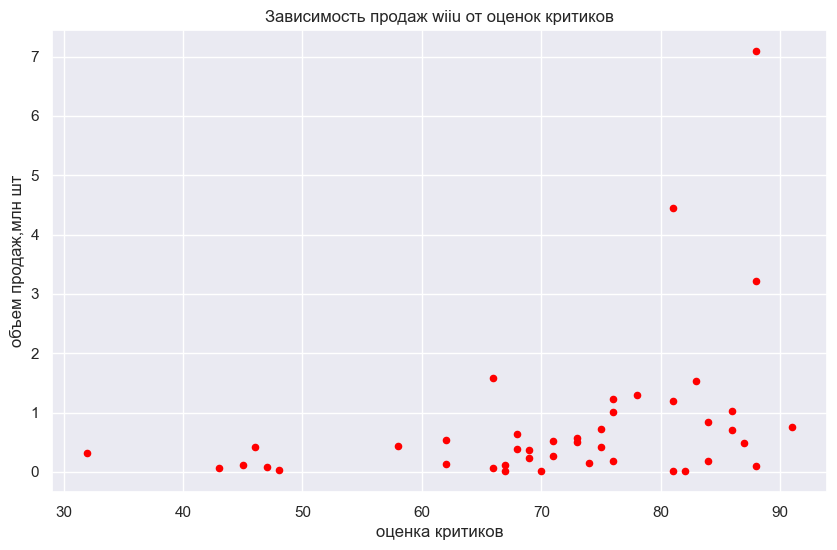

In [72]:
# создание диаграммы рассеяния для платформы wiiu и оценки критиков
games_wiiu.query('critic_score != -1').\
    plot(kind='scatter', 
         x='critic_score', 
         y='total_sales', 
         color='red', figsize=(10,6))
plt.xlabel(
    'оценка критиков')
plt.ylabel(
    'объем продаж,млн шт')
plt.title(
    'Зависимость продаж wiiu от оценок критиков')
plt.show()

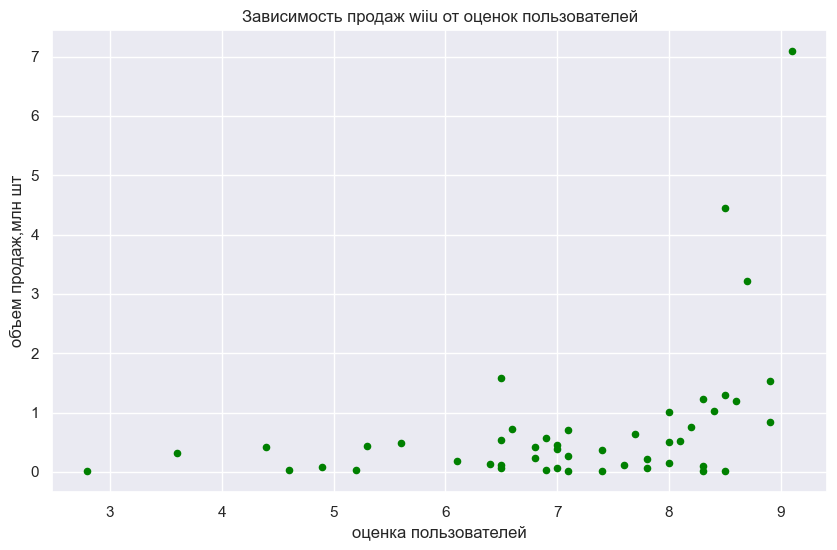

In [73]:
# построение диаграмм рассеяния для платформы wiiu и оценки пользователей
games_wiiu.query('user_score != -1').\
    plot(kind='scatter', x='user_score', 
         y='total_sales', color='green', 
         figsize=(10,6))
plt.xlabel(
    'оценка пользователей')
plt.ylabel(
    'объем продаж,млн шт')
plt.title(
    'Зависимость продаж wiiu от оценок пользователей')
plt.show()

#### PC

In [74]:
# выборка платформы pc
games_pc = game[game['platform'] == 'pc']

# рассчет коэффициента корреляции объема продаж и оценки критиков и пользователей
corr_critic_pc = games_pc.query('critic_score != -1')\
                 [['total_sales','critic_score']].corr()

corr_user_pc = games_pc.query('user_score != -1')\
                 [['total_sales','user_score']].corr()

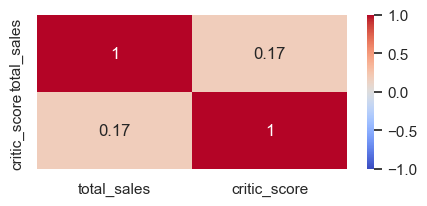

In [75]:
# построение тепловой карты корреляции объема продаж и оценки критиков
sns.set(rc = {'figure.figsize':(5,2)})
sns.heatmap(corr_critic_pc, cmap='coolwarm', annot=True, vmax=1, vmin=-1);

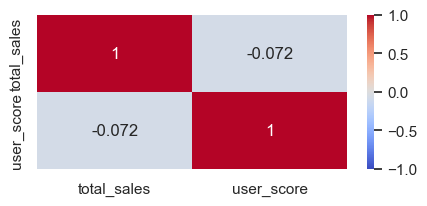

In [76]:
# построение тепловой карты корреляции объема продаж и оценки пользователей
sns.set(rc = {'figure.figsize':(5,2)})
sns.heatmap(corr_user_pc, cmap='coolwarm', annot=True, vmax=1, vmin=-1);

#### PSV

In [77]:
# выборка платформы psv
games_psv = game[game['platform'] == 'psv']

# рассчет коэффициента корреляции объема продаж и оценки критиков и пользователей
corr_critic_psv = games_psv.query('critic_score != -1')\
                 [['total_sales','critic_score']].corr()

corr_user_psv = games_psv.query('user_score != -1')\
                 [['total_sales','user_score']].corr()

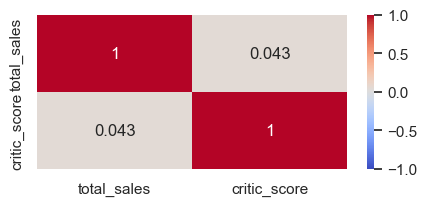

In [78]:
# построение тепловой карты корреляции объема продаж и оценки критиков
sns.set(rc = {'figure.figsize':(5,2)})
sns.heatmap(corr_critic_psv, cmap='coolwarm', annot=True, vmax=1, vmin=-1);

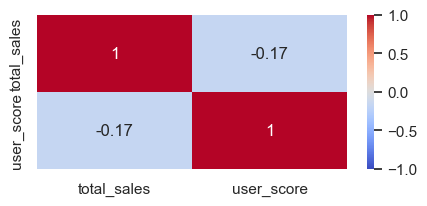

In [79]:
# построение тепловой карты корреляции объема продаж и оценки пользователей
sns.set(rc = {'figure.figsize':(5,2)})
sns.heatmap(corr_user_psv, cmap='coolwarm', annot=True, vmax=1, vmin=-1);

 <div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
    Рассчитав и ознакомившись с коэффициентами корреляции между продажами игр на разных платформах и оценками критиков и пользователей, отметим следующее:
<li> <b><span style="color:#de3163">корреляция между продажами игр и оценками критиков</span></b> по некоторым платформам(XOne, PS3, 3DS, WII U) является умеренной средней, как и корреляция, рассчитанная для самой популярной платформы - PS4.</li>
<li> самый высокий уровень корреляции из представленных на игры, выпущенные на таких платформах как PS3 и Xone, - 0.45 и 0.43, соответственно;</li>
<li> самый низкий уровень корреляции из представленных на игры, выпущенные на таких платформах как PSV и PC, - 0.043 и 0.17, соответственно;</li>    
<li><b> Но в целом нельзя подтвердить наличие зависимости продаж от критиков, так как на графиках рассеяния по нескольким платформам отображено большое число игр с низкими продажами, хотя они имеют высокие рейтинги. Скорее всего, здесь оказывает влияние третий, скрытый, фактор. Лучше применить метод меножественной линейной регрессии для изучения зависимости.</b></li>     
    
<li> <b><span style="color:#de3163">зависимость уровня продаж игр на платформах от оценок пользователей</span></b> почти отсутствует на платформах PS4, XOne, PC, корреляция крайне близка к 0, что говорит о том, что критика игры пользователями не окажет влияния на объем продаж. 
<li>На платформах PSV, PS3, 3DS коэффициент корреляции чуть выше, но связь все равно слабая. </li>     
<li>Здесь выделется платформа - Wii U;</li>
<li> на платформе Wii U коэффициент корреляции продаж игр и оценки пользователей равен 0.41 (умеренная средняя). Примечательно, что на платформе Wii U коэффициент корреляции оценки пользователей и уровеня продаж даже сильнее, чем оценки критиков. <br></li>
    <li>Построив несколько диаграмм рассеяния для самых популярных платформ, мы видим, что на платформе WII U, например, график весьма хаотичен. Точки на графике зависимости продаж и оценки пользователей расположены в хаотичном порядке, хотя коэффициент корреляции отражает среднюю зависимость. Такая же ситуация и на графике зависимости продаж и оценкой критиков.</li>
    <li><b> Мы не нашли подтверждение наличия зависимости продаж от оценок пользователей по нашим данным.</b> </li> 
</div> 

### Распределение игр по жанрам

In [80]:
# создание сводной таблицы с распределением игр по жанрам
game_genre_pivot = game.groupby('genre').\
     agg(release = ('name','count'), sales=('total_sales','sum')).\
     sort_values(by='sales', ascending=False)
game_genre_pivot

release   sales
genre                        
action            619  199.36
shooter           128  170.94
sports            161  109.48
role-playing      221  101.44
misc              113   37.55
fighting           60   28.22
racing             69   27.52
platform           38   18.09
adventure         185   17.55
simulation         44   13.13
strategy           37    3.96
puzzle             14    2.21

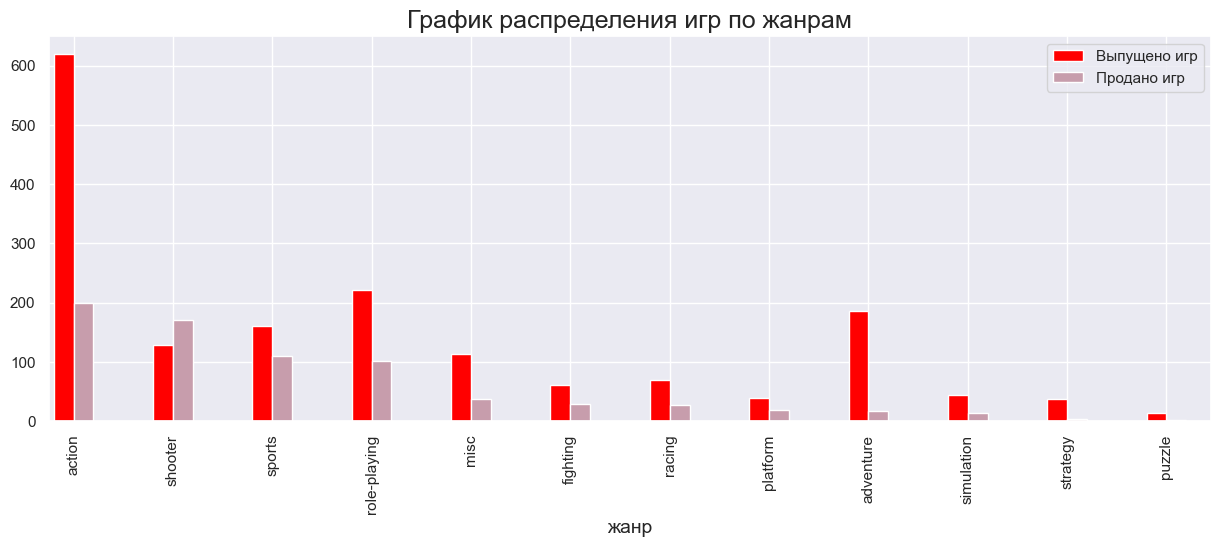

In [81]:
# создание графика распределения игр по жанрам и уровню продаж и релиза
game_genre_pivot['release'].\
     plot(kind='bar', figsize=(15,5), color='red', width=0.2, position=1)

game_genre_pivot['sales'].\
     plot(kind='bar', figsize=(15,5), color='#c79dac', width=0.2, position=0)

plt.title("График распределения игр по жанрам", fontsize=18)
plt.xlabel('жанр', fontsize=14)
plt.legend(['Выпущено игр', 'Продано игр'])
plt.show()

Итак,  
**Подажи**  
Самые продаваемые жанры в играх - Action, Shooter(уровень продаж выше объема выпуска), Sports, Role-playing.  
Низкие продажи у жанров - Strategy и Puzzle.  
  
**Релиз**  
Чаще всего выпускают игры жанром - Action(явный лидер), Role-playing, Adventure, Sports и Shooter.  
Редко выпускают игры жанром - Puzzle.  
  
  
**Выделим лидеров: игры с жанрами Action, Shooter, Sports, Role-playing. Их покупают чаще остальных.**

*Посмотрим игры каких жанров чаще всего выпускают на различных платформах.*

In [82]:
# график параллельных категорий для ps4
px.parallel_categories(game.query('platform == "ps4"'), 
                       dimensions=['platform', 'genre'])


In [83]:
# график параллельных категорий для X One
px.parallel_categories(game.query('platform == "xone"'), 
                       dimensions=['platform', 'genre'])

In [84]:
# график параллельных категорий для 3ds
px.parallel_categories(game.query('platform == "3ds"'), 
                       dimensions=['platform', 'genre'])

In [85]:
# график параллельных категорий для ps3
px.parallel_categories(game.query('platform == "ps3"'), 
                       dimensions=['platform', 'genre'])


In [86]:
# график параллельных категорий для x360
px.parallel_categories(game.query('platform == "x360"'), 
                       dimensions=['platform', 'genre'])


In [87]:
# график параллельных категорий для wii u
px.parallel_categories(game.query('platform == "wiiu"'), 
                       dimensions=['platform', 'genre'])                           

*Чаще всего на эти платформы выпускают игры такого жанра, как:*  
- PS4: Action, Role-playing, Sports, Shooter;
- Xbox One: Action, Shooter, Sports;
- 3DS: Action, Role-playing, Adventure, Misc;
- PS3: Action, Sports, Role-playing, Adventure;
- Will U: Action, Misc, Platform;
- Xbox360: Action, Sports, Shooter.

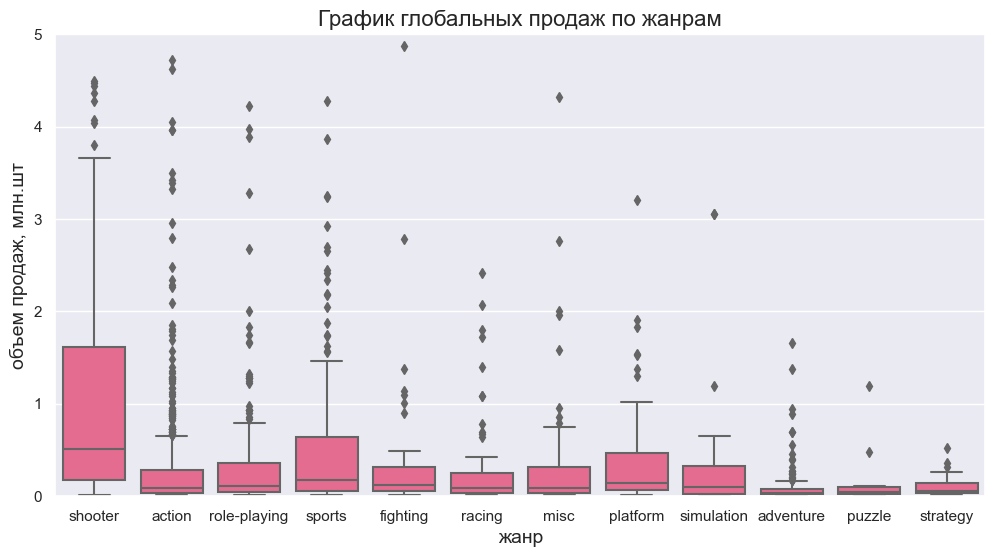

In [88]:
# построение ящиков с усами по продажам в зависимости от жанра
plt.figure(figsize=(12,6)) 
sns.boxplot(x='genre', y='total_sales', data=game, color='#F85888').\
           set_title("График глобальных продаж по жанрам", fontsize=16) 
plt.xlabel('жанр', fontsize=14)
plt.ylabel('объем продаж, млн.шт', fontsize=14)
plt.ylim(0,5)
plt.show()

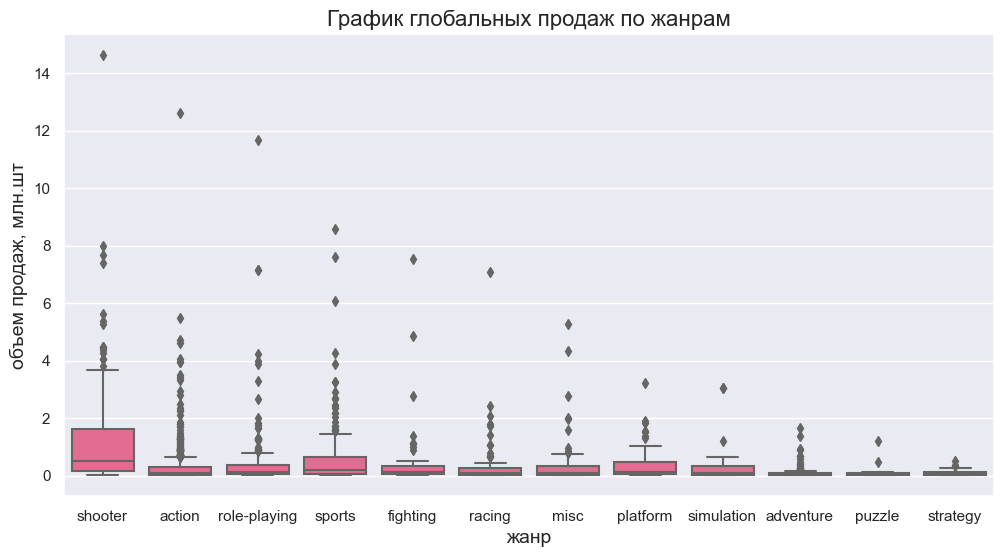

In [89]:
# построение ящиков с усами по продажам в зависимости от жанра 100% масштаб
plt.figure(figsize=(12,6)) 
sns.boxplot(x='genre', y='total_sales', data=game, color='#F85888').\
           set_title("График глобальных продаж по жанрам", fontsize=16) 
plt.xlabel('жанр', fontsize=14)
plt.ylabel('объем продаж, млн.шт', fontsize=14)
plt.show()

Жанр Shooter имеет самый длинный ряд успешно проданных игр, в данном жанре есть игра, число продаж которой превысило 14млн.копий. Здесь наибольшая вариативность проданных игр и наибольший объем продаж. Выбросы говорят нам о том, что в этом жанре встречаются игры-рекордсмены, продаваемые миллионным тиражом. Shooter является самым стабильным жанром. Также медиана здесь наибольшая, что подтвержает высокий интерес игроков к играм данного жанра. 
Жанр Action выделяется своей нестабильностью. Ширина ящика невелика, большинство игр продаются в незначительных количествах. Но стоит обратить внимание на количество выбросов. В данном жанре их максимальное количество. Значит, на рынке представлено много игр-бестселлеров в жанре Action, которые так привлекают игроманов.  
Жанры Sports и Role-playing также не отличаются стабильностью. Высокие продажи связаны с наличием игр-рекордсменов в данном жанре. А основная линейка игр с такими жанрами не пользуется сильной популярностью.

<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
Самые продаваемые жанры - <b><span style="color:#de3163"> Action, Shooter, Sports, Role-playing</span></b>. Чаще всего выпускают игры жанром - Action(явный лидер), Role-playing,  Adventure, Sports и Shooter.<br>
Жанры с низкими продажами -  <b><span style="color:#de3163">Strategy и Puzzle</span>.</b><br>
Жанр Shooter - самый стабильный жанр, имеющий широкую линейку популярных и хорошо продаваемых игр.<br> 
В жанре Action выпускалось большое количество игр-бестселлеров, но в целом основная линейка игры не пользуются сильной популярностью.<br>
Жанр Action - самый часто выпускаемый жанр для всех платформ.<br>
</div>

### Вывод после исследовательского анализа: 

<p></p>

<div style="border:solid pink 5px; padding: 20px">
<li>Нами был взят период исследования <b><span style="color:#c71585">2014-2016гг</span></b>;</li>
<li>Срок жизни одной платформы равен примерно <b><span style="color:#c71585">10 годам</span></b>. Каждые 4-5 лет компании стараются обновлять свою консоль, чтобы платформа соответствовала техническим требованиям вновь выпущенных игр;</li>
<li>Лидеры продаж на конец 2016 года - <b><span style="color:#c71585"> PlayStation4, Xbox One и Nintendo 3DS </span></b>;</li>
<li>В рекомендацию также можно включить - <b><span style="color:#c71585"> PC и PS Vita </span></b>;</li>
<li>Платформы <b><span style="color:#c71585">Wii U, Xbox 360 и PlayStation 3</span></b> постепенно теряют объемы продаж, отметим динамику спада, но еще какое-то время платформы останутся на рынке;</li> 
<li>Платформы <b><span style="color:#c71585">Wii U, Xbox One, PlayStation4, Xbox 360, Wii</span></b> имеют наиболее продаваемую линейку игр;</li>
<li>Для платформы <b><span style="color:#c71585"> PlayStation4</span></b> выпускается больше всего игр-бестселлеров. Чуть отстает от нее - Nintendo 3DS. Также на платформах Xbox One, Wii U, PS3, Xbox 360 можно встретить весомое количество игр, так полюбившихся игрокам;</li>    
<li> <b><span style="color:#c71585">Оценка критиков и пользователей</span></b> не оказывает прямого влияния на уровень продаж;</li>
<li>Самые продаваемые жанры - <b><span style="color:#c71585">Action, Shooter, Sports, Role-playing</span></b>. Чаще всего выпускают игры жанром - Action(явный лидер), Role-playing, Adventure и Sports. Жанр Action - самый часто выпускаемый жанр для всех платформ;</li>
<li>Жанр <b><span style="color:#c71585">Shooter</span></b> имеет самую продаваемую линейку игр и значительное количество игр-рекордсменов, которые так нравятся игрокам, в жанре  <b><span style="color:#c71585">Action</span></b> было выпущено много игр-бестселлеров, но основная линейка мало привлекает покупателей.</li>
<li>Жанры с низкими продажами - <b><span style="color:#c71585">Strategy и Puzzle</span></b>.</li>
</div> 

## Средний пользователь в разрезе региона (Северная Америка, Европа, Япония)

### Северная Америка

In [90]:
# создание сводной таблицы с распределением игр по жанрам в Северной Америке
game_na_genre = game.groupby('genre').\
     agg(sales=('na_sales','sum')).\
     sort_values(by='sales', ascending=False)
game_na_genre.columns = ['na_sales']
game_na_genre

na_sales
genre                 
shooter          79.02
action           72.53
sports           46.13
role-playing     33.47
misc             15.05
fighting         12.43
racing            8.74
platform          6.79
adventure         5.64
simulation        2.63
strategy          0.98
puzzle            0.65

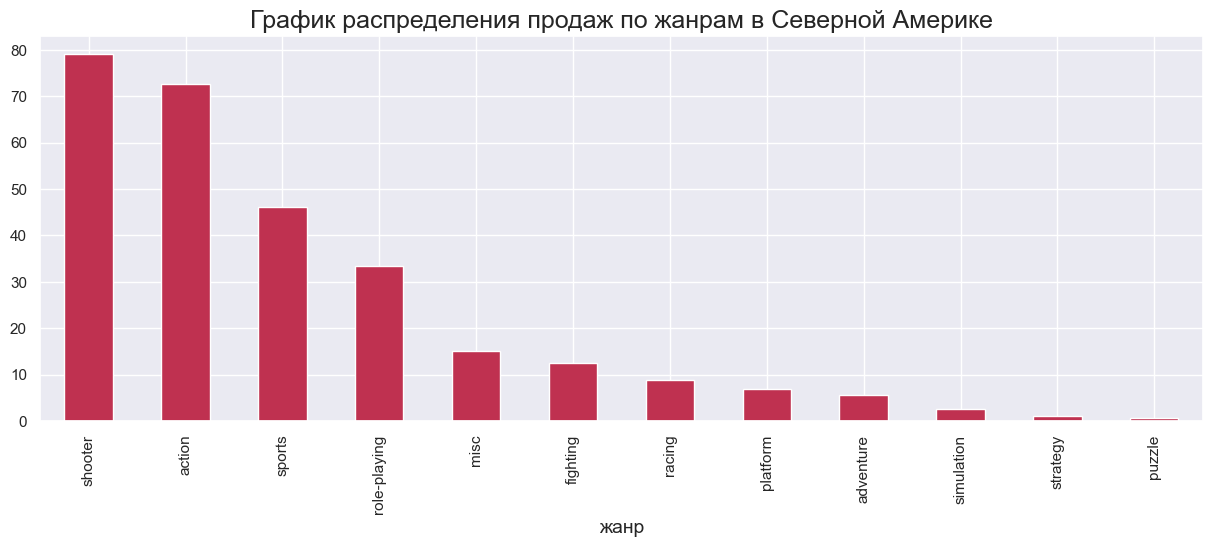

In [91]:
# создание графика распределения игр по жанрам и уровню продаж в Северной Америке

game_na_genre['na_sales'].\
     plot(kind='bar', figsize=(15,5), color='#bf3150')

plt.title("График распределения продаж по жанрам в Северной Америке", fontsize=18)
plt.xlabel('жанр', fontsize=14)
plt.show()

In [92]:
# создание сводной таблицы с распределением продаж по платформам в Северной Америке
game_na_platform = game.pivot_table(
    index = 'platform', 
    values = 'na_sales', 
    aggfunc = 'sum'
    ).fillna(0).\
    sort_values(by='na_sales', ascending=False)
game_na_platform

na_sales
platform          
ps4          98.61
xone         81.27
x360         28.30
3ds          22.64
ps3          22.05
wiiu         19.36
pc            7.23
psv           2.52
wii           2.08
psp           0.00

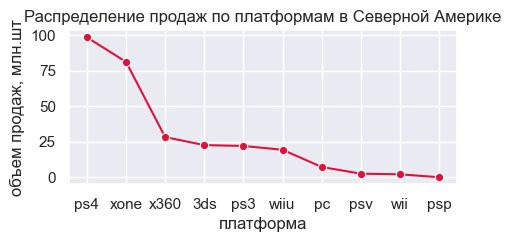

In [93]:
# создание диаграммы распределения продаж по платформам в Северной Америке
sns.lineplot(x = game_na_platform.index,
             y = 'na_sales', 
             data = game_na_platform, 
             color='#dc143c',
             linestyle='-', marker='o'
             )

plt.xlabel('платформа')
plt.ylabel('объем продаж, млн.шт')
plt.title('Распределение продаж по платформам в Северной Америке')
plt.show()
sns.set(rc={'figure.figsize':(10,5)})

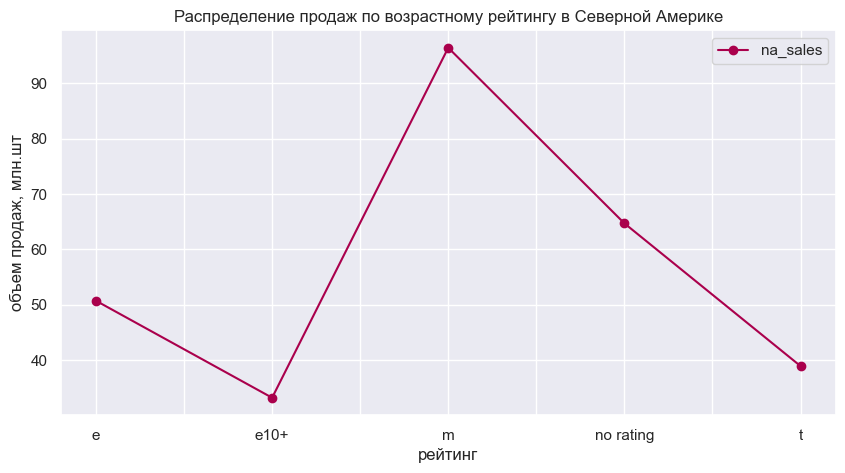

na_sales  count
rating                    
m             96.42    265
no rating     64.72    749
e             50.74    219
t             38.95    271
e10+          33.23    185

In [94]:
# построение диаграммы рассеяния(зависимость между продажей и возрастным рейтингом) 
# в Северной Америке
game_na_rating = game.pivot_table(index = 'rating', 
                                  values = 'na_sales', 
                                  aggfunc = ['sum', 'count'])
game_na_rating.columns = ['na_sales', 'count']
game_na_rating.plot(y = 'na_sales', style = 'o-', color='#aa004c')
plt.xlabel('рейтинг')
plt.ylabel('объем продаж, млн.шт')
plt.title('Распределение продаж по возрастному рейтингу в Северной Америке')
plt.show()

game_na_rating.sort_values('na_sales', ascending = False)


<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
    <li>Топ-5 самых популярных <b><span style="color:#6495ed">жанров</span></b> среди пользователей (по уменьшению): Shooter, Action, Sports, Role-Playing, Misc.</li>
    <li>В Северной Америке наибольшую популярность имеют игры на <b><span style="color:#6495ed"> приставки </span></b> PS4 и XboxOne. Это явные лидеры. Замыкают топ Xbox360, 3DS, PS3, их доли примерно равны.</li>
    <li>В Северной Америке большая часть продаж относится к играм с <b><span style="color:#6495ed"> рейтингом </span></b> "для лиц старше 17 лет", второе место - игры с рейтингом "для всех возрастных категорий", около 23% игр оказались без рейтинга. И последнее место по популярности делят игры "для лиц старше 13 лет" и "для лиц старше 10 лет".</li>
    <b><span style="color:#6495ed">Портрет среднего пользователя в Северной Америке выглядит так:</span></b><br>
    <li>Человек старше 17 лет, который предпочитает играть в Шутер на платформе PS4.</li>
</div>

### Европа

In [95]:
# создание сводной таблицы с распределением игр по жанрам в Европе
game_eu_genre = game.groupby('genre').\
     agg(sales=('eu_sales','sum')).\
     sort_values(by='sales', ascending=False)
game_eu_genre.columns = ['eu_sales']
game_eu_genre

eu_sales
genre                 
action           74.68
shooter          65.52
sports           45.73
role-playing     28.17
racing           14.13
misc             12.86
simulation        7.30
platform          6.80
fighting          6.69
adventure         6.49
strategy          1.79
puzzle            0.52

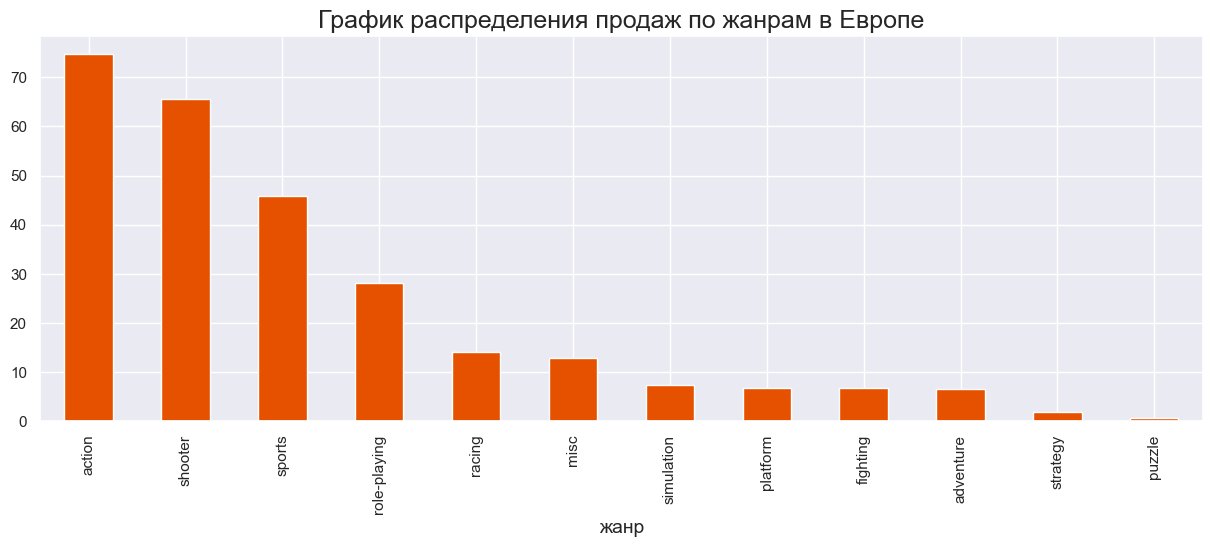

In [96]:
# создание графика распределения игр по жанрам и уровню продаж в Европе

game_eu_genre['eu_sales'].\
     plot(kind='bar', figsize=(15,5), color='#e65100')

plt.title("График распределения продаж по жанрам в Европе", fontsize=18)
plt.xlabel('жанр', fontsize=14)
plt.show()

In [97]:
# создание сводной таблицы с распределением продаж по платформам в Европе
game_eu_platform = game.pivot_table(
    index = 'platform', 
    values = 'eu_sales', 
    aggfunc = 'sum'
    ).fillna(0).\
    sort_values(by='eu_sales', ascending=False)
game_eu_platform

eu_sales
platform          
ps4         130.04
xone         46.25
ps3          25.54
pc           17.97
3ds          16.12
x360         15.49
wiiu         13.15
psv           3.53
wii           2.59
psp           0.00

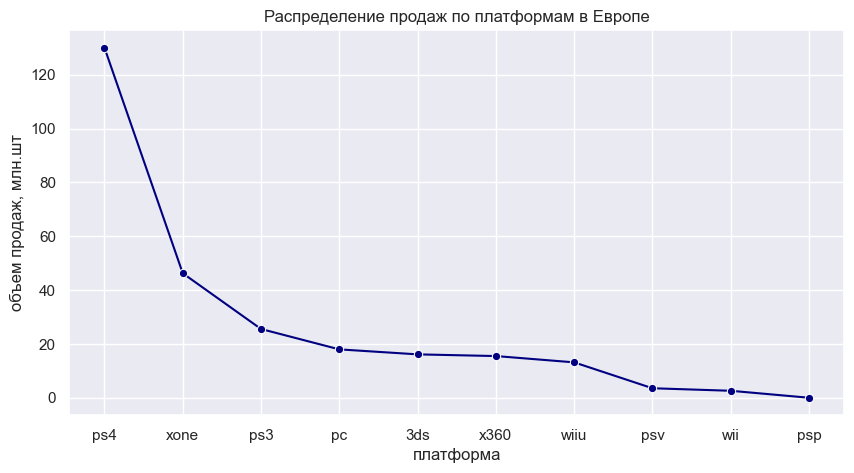

In [98]:
# создание диаграммы распределения продаж по платформам в Европе
sns.lineplot(x = game_eu_platform.index,
             y = 'eu_sales', 
             data = game_eu_platform, 
             color='#000080',
             linestyle='-', marker='o'
             )

plt.xlabel('платформа')
plt.ylabel('объем продаж, млн.шт')
plt.title('Распределение продаж по платформам в Европе')
plt.show()
sns.set(rc={'figure.figsize':(10,5)})

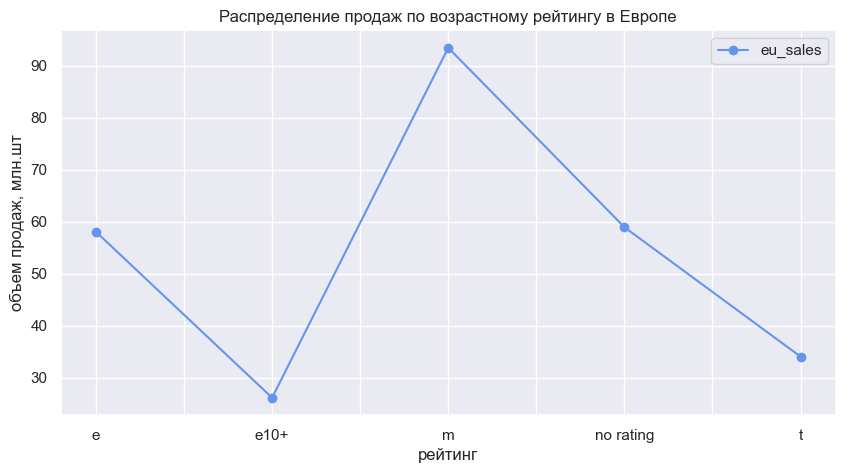

eu_sales  count
rating                    
m             93.44    265
no rating     58.95    749
e             58.06    219
t             34.07    271
e10+          26.16    185

In [99]:
# построение диаграммы рассеяния(зависимость между продажей и возрастным рейтингом) 
# в Европе
game_eu_rating = game.pivot_table(index = 'rating', 
                                  values = 'eu_sales', 
                                  aggfunc = ['sum', 'count'])
game_eu_rating.columns = ['eu_sales', 'count']
game_eu_rating.plot(y = 'eu_sales', style = 'o-', color='#6495ed')
plt.xlabel('рейтинг')
plt.ylabel('объем продаж, млн.шт')
plt.title('Распределение продаж по возрастному рейтингу в Европе')
plt.show()

game_eu_rating.sort_values('eu_sales', ascending = False)

<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
    <li>Топ-5 самых популярных <b><span style="color:#6495ed">жанров</span></b> среди пользователей (по уменьшению): Action, Shooter, Sports, Role-Playing, Racing.</li>
    <li>В Европе наибольшую популярность имеют игры на <b><span style="color:#6495ed"> приставки </span></b> японского производителя Sony - PS4, огромный отрыв. Следом идет Xbox One. Замыкают топ PS3, PC и 3DS. Они примерно на одном уровне.</li>
    <li>В Европе большая часть продаж относится к играм с <b><span style="color:#6495ed"> рейтингом </span></b> "для лиц старше 17 лет", второе место - игры с рейтингом "для всех возрастных категорий", около 22% игр оказались без рейтинга. И последнее место по популярности делят игры "для лиц старше 13 лет" и "для лиц старше 10 лет".</li>
    <b><span style="color:#6495ed">Портрет среднего пользователя в Европе выглядит так:</span></b><br>
    <li>Человек старше 17 лет, который предпочитает играть в Экшен на консоли PS4.</li>
</div>

### Япония

In [100]:
# создание сводной таблицы с распределением игр по жанрам в Японии
game_jp_genre = game.groupby('genre').\
     agg(sales=('jp_sales','sum')).\
     sort_values(by='sales', ascending=False)
game_jp_genre.columns = ['jp_sales']
game_jp_genre

jp_sales
genre                 
role-playing     31.16
action           29.58
fighting          6.37
misc              5.61
shooter           4.87
adventure         3.60
sports            3.26
platform          2.69
simulation        2.31
racing            1.76
strategy          0.95
puzzle            0.93

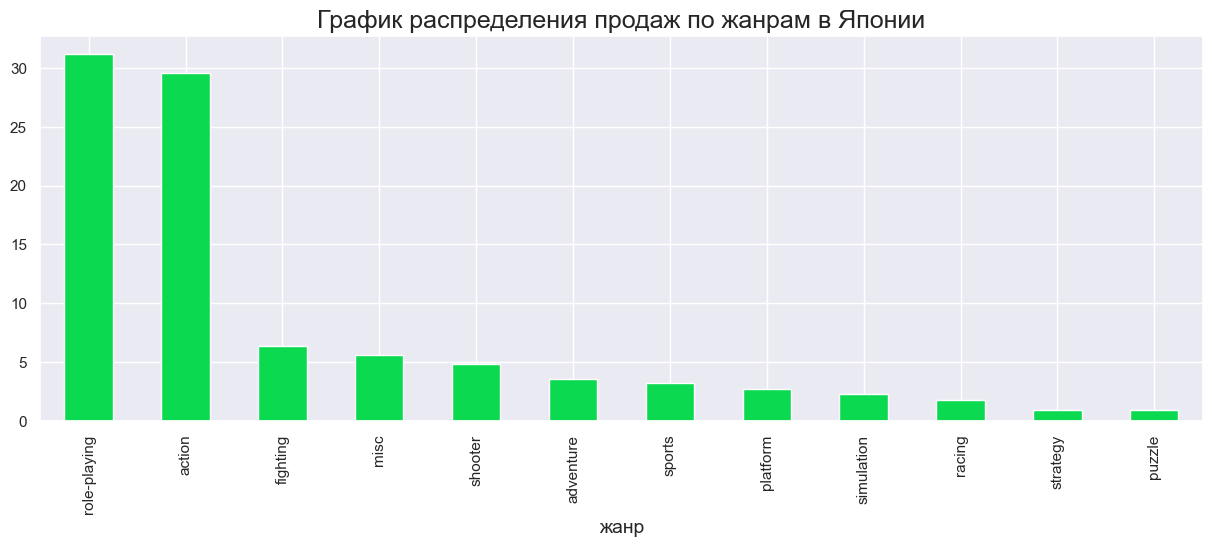

In [101]:
# создание графика распределения игр по жанрам и уровню продаж в Японии

game_jp_genre['jp_sales'].\
     plot(kind='bar', figsize=(15,5), color='#0bda51')

plt.title("График распределения продаж по жанрам в Японии", fontsize=18)
plt.xlabel('жанр', fontsize=14)
plt.show()

In [102]:
# создание сводной таблицы с распределением продаж по платформам в Японии
game_jp_platform = game.pivot_table(
    index = 'platform', 
    values = 'jp_sales', 
    aggfunc = 'sum'
    ).fillna(0).\
    sort_values(by='jp_sales', ascending=False)
game_jp_platform

jp_sales
platform          
3ds          44.24
ps4          15.02
psv          14.54
ps3          11.22
wiiu          7.31
psp           0.36
xone          0.32
x360          0.08
pc            0.00
wii           0.00

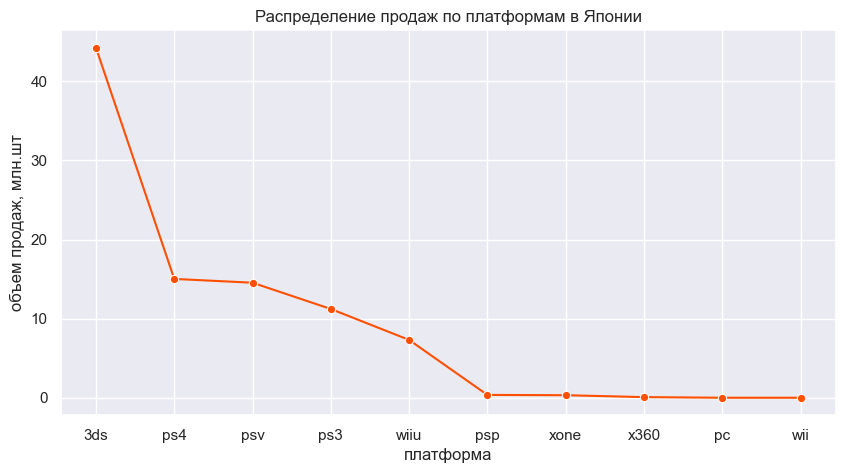

In [103]:
# создание диаграммы распределения продаж по платформам в Японии
sns.lineplot(x = game_jp_platform.index,
             y = 'jp_sales', 
             data = game_jp_platform, 
             color='#ff4f00',
             linestyle='-', marker='o'
             )

plt.xlabel('платформа')
plt.ylabel('объем продаж, млн.шт')
plt.title('Распределение продаж по платформам в Японии')
plt.show()
sns.set(rc={'figure.figsize':(10,5)})

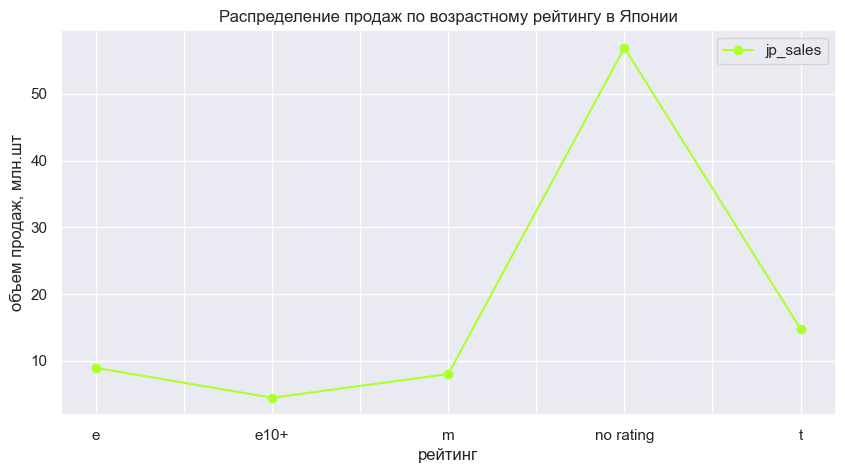

jp_sales  count
rating                    
no rating     56.90    749
t             14.78    271
e              8.94    219
m              8.01    265
e10+           4.46    185

In [104]:
# построение диаграммы рассеяния(зависимость между продажей и возрастным рейтингом) 
# в Японии
game_jp_rating = game.pivot_table(index = 'rating', 
                                  values = 'jp_sales', 
                                  aggfunc = ['sum', 'count'])
game_jp_rating.columns = ['jp_sales', 'count']
game_jp_rating.plot(y = 'jp_sales', style = 'o-', color='#adff2f')
plt.xlabel('рейтинг')
plt.ylabel('объем продаж, млн.шт')
plt.title('Распределение продаж по возрастному рейтингу в Японии')
plt.show()

game_jp_rating.sort_values('jp_sales', ascending = False)

<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
    <li>Топ-5 самых популярных <b><span style="color:#6495ed">жанров</span></b> среди пользователей (по уменьшению): Role-Playing, Action - явные лидеры. Их доля почти одинакова - 33 и 32% соответственно. Fighting, Misc и Shooter замыкают топ. Они составили 5-7% от всех представленных жанров.</li>
    <li>В Японии наибольшую популярность имеют игры на <b><span style="color:#6495ed"> приставки </span></b> японского производителя Nintendo - 3DS. Причем отрыв значительный - 48%. Следом идут японские консоли от компании Sony - PS 4 и PlayStation Vita, они составили по 16%. Замыкают топ PS3 и Wii U.</li>
    <li>В Японии большая доля игр без рейтинга - около 61%, то есть больше половины всей выборки. Оставшиеся данные распределились следующим образом: большая часть продаж относится к играм с <b><span style="color:#6495ed"> рейтингом </span></b> "для лиц старше 13 лет"(16%), второе место - игры с рейтингом "для всех возрастных категорий", следом - "для лиц старше 17 лет"(9%). И последнее место по популярности занимают игры "для лиц старше 10 лет".</li>
    <b><span style="color:#6495ed">Портрет среднего пользователя в Японии выглядит так:</span></b><br>
    <li>Человек, который предпочитает играть в Ролевую игру или Экшен на консоли 3DS и в любом случае отдает предпочтение платформам внутреннего рынка.</li>
</div>

In [105]:
# подсчет доли рынка регионов
na = game['na_sales'].agg('sum')/game['total_sales'].agg('sum')
eu = game['eu_sales'].agg('sum')/game['total_sales'].agg('sum')
jp = game['jp_sales'].agg('sum')/game['total_sales'].agg('sum')
print('Доля рынка Северной Америки составляет {:.2%} от глобального рынка игр.'.\
       format(na))
print('Доля рынка Европы составляет {:.2%} от глобального рынка игр.'.format(eu))
print('Доля рынка Японии составляет {:.2%} от глобального рынка игр.'.format(jp))

Доля рынка Северной Америки составляет 38.94% от глобального рынка игр.
Доля рынка Европы составляет 37.11% от глобального рынка игр.
Доля рынка Японии составляет 12.76% от глобального рынка игр.


In [106]:
# добавление строки "другие" в топ-5 платформ Япония
game_jp_platf_top = game_jp_platform[:5]
game_jp_platf_top = game_jp_platf_top.\
                    reindex([*game_jp_platf_top.index, "other"])

game_jp_platf_top.at['other','jp_sales'] = \
                   game_jp_platform[5:]['jp_sales'].sum()


In [107]:
# добавление строки "другие" в топ-5 платформ Северная Америка
game_na_platf_top = game_na_platform[:5]
game_na_platf_top = game_na_platf_top.\
                    reindex([*game_na_platf_top.index, "other"])

game_na_platf_top.at['other','na_sales'] = \
               game_na_platform[5:]['na_sales'].sum()


In [108]:
# добавление строки "другие" в топ-5 платформ Европа
game_eu_platf_top = game_eu_platform[:5]
game_eu_platf_top = game_eu_platf_top.\
                    reindex([*game_eu_platf_top.index, "other"])

game_eu_platf_top.at['other','eu_sales'] = \
                game_eu_platform[5:]['eu_sales'].sum()


In [109]:
# добавление строки "другие" в топ-5 жанров Япония
game_jp_genre_top = game_jp_genre[:5]
game_jp_genre_top = game_jp_genre_top.\
                    reindex([*game_jp_genre_top.index, "other"])

game_jp_genre_top.at['other','jp_sales'] = \
                 game_jp_genre[5:]['jp_sales'].sum()


In [110]:
# добавление строки "другие" в топ-5 жанров Северная Америка
game_na_genre_top = game_na_genre[:5]
game_na_genre_top = game_na_genre_top.\
                    reindex([*game_na_genre_top.index, "other"])

game_na_genre_top.at['other','na_sales'] = \
                  game_na_genre[5:]['na_sales'].sum()


In [111]:
# добавление строки "другие" в топ-5 жанров Европа
game_eu_genre_top = game_eu_genre[:5]
game_eu_genre_top = game_eu_genre_top.\
                    reindex([*game_eu_genre_top.index, "other"])

game_eu_genre_top.at['other','eu_sales'] = \
                   game_eu_genre[5:]['eu_sales'].sum()


In [112]:
# функция для создания круговой диаграммы для регионов
def top_five_platf(data, rating, ax):
    pivot = data
    title_pie = {'na_sales': 'Северная Америка',
                 'eu_sales': 'Европа', 
                 'jp_sales': 'Япония'}
    plot = pivot.plot(kind='pie', label='',
                      legend=False, y=rating,
                      title=title_pie[rating], ax=axes[ax], 
                      fontsize=14, 
                      labeldistance=1.15, 
                      wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
   colors = ['#ff0000', '#7cfc00', '#6495ed', '#ffff74', '#fadadd', 'orange'],
                      
                      autopct='%1.0f%%')
    

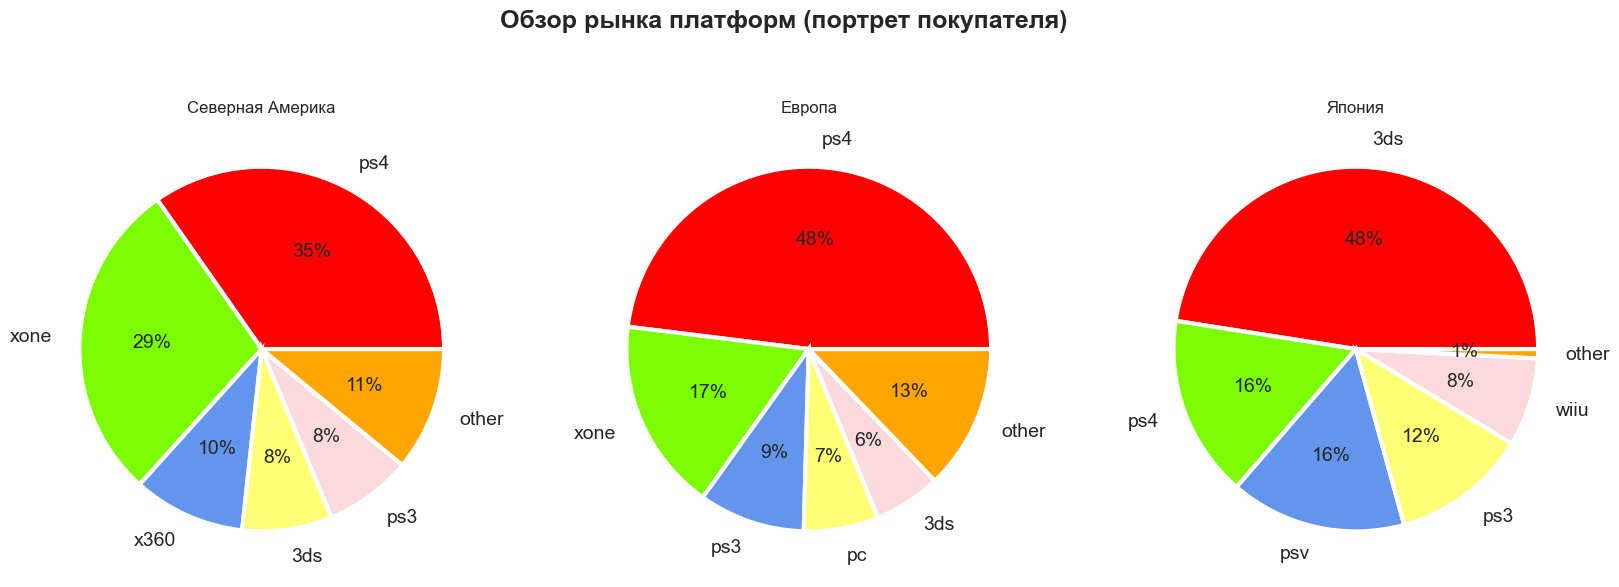

In [113]:
# создание круговых диаграмм по рынку платформ
fig, axes = plt.subplots(1, 3, figsize=(20,7))
fig.suptitle('Обзор рынка платформ (портрет покупателя)', 
             fontsize=18, fontweight='bold')

top_five_platf(game_na_platf_top, 'na_sales', 0)
top_five_platf(game_eu_platf_top, 'eu_sales', 1)
top_five_platf(game_jp_platf_top, 'jp_sales', 2)

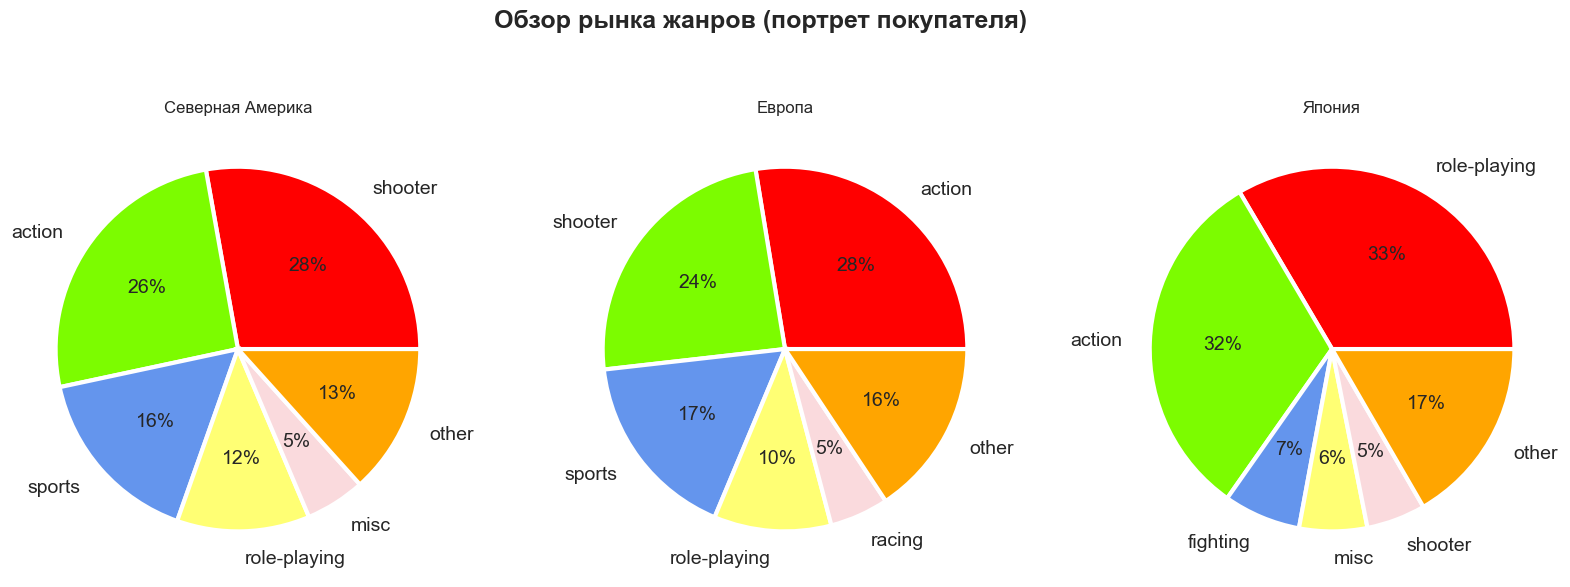

In [114]:
# создание круговых диаграмм по рынку жанров
fig, axes = plt.subplots(1, 3, figsize=(20,7))
fig.suptitle('Обзор рынка жанров (портрет покупателя)',
             fontsize=18, fontweight='bold')
top_five_platf(game_na_genre_top, 'na_sales', 0)
top_five_platf(game_eu_genre_top, 'eu_sales', 1)
top_five_platf(game_jp_genre_top, 'jp_sales', 2)

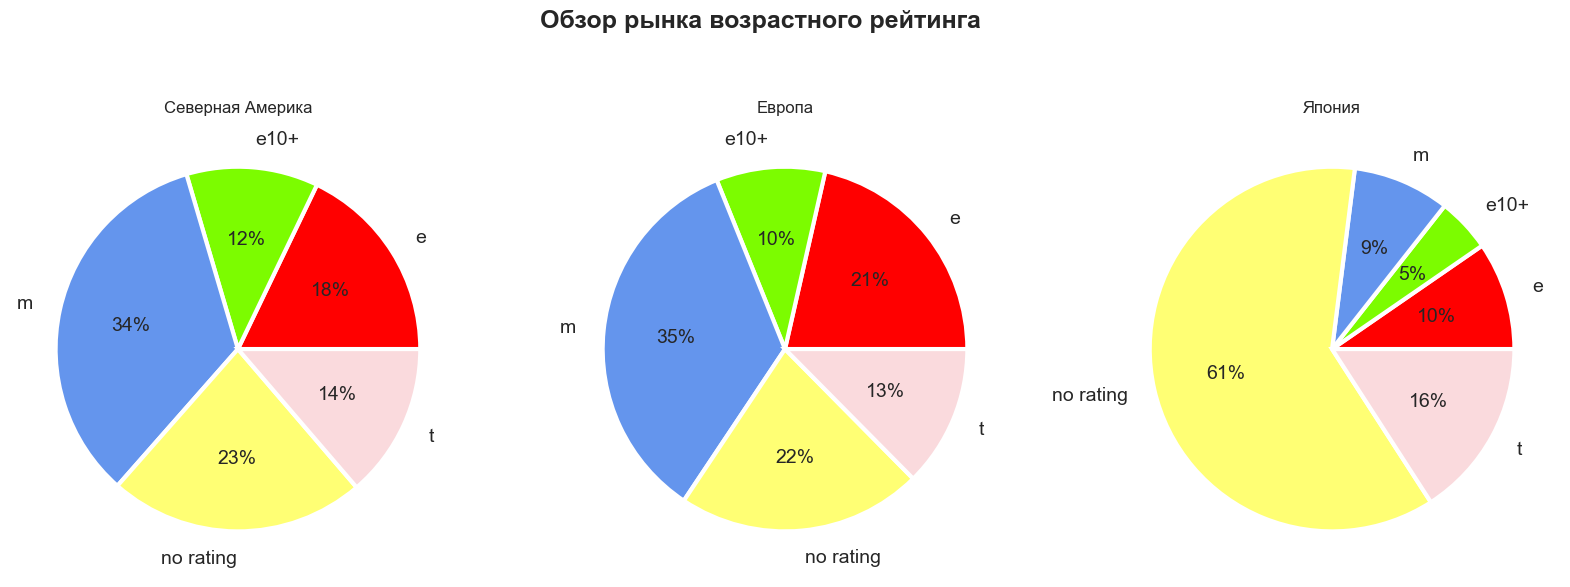

In [115]:
# создание круговых диаграмм по возрастным ограничениям в регионах
fig, axes = plt.subplots(1, 3, figsize=(20,7))
fig.suptitle('Обзор рынка возрастного рейтинга',
             fontsize=18, fontweight='bold')
top_five_platf(game_na_rating, 'na_sales', 0)
top_five_platf(game_eu_rating, 'eu_sales', 1)
top_five_platf(game_jp_rating, 'jp_sales', 2)

### Общий вывод: 

<p></p>

<div style="border:solid pink 5px; padding: 20px">
    <li>Игровой рынок в <b><span style="color:#c71585">Северной Америке и Европе</span></b> весьма схож. Пользователи здесь предпочитают играть в игры жанра шутер(28% и 24%), экшен(26% и 28%), спортивные игры и ролевые с возрастным ограничением 17+. Любимыми платформами стали PS4 или Xbox One, причем в Европе доля PS4 занимает почти половину рынка платформ(48%).</li>
    <li>В <b><span style="color:#c71585">Японии</span></b> рынок сложился иначе. Здесь пользователи чаще всего выбирают ролевые игры и экшены(с сильным отрывом) с возрастным ограничением "для лиц старше 13 лет", любимые консоли в Японии - исключительно консоли внутреннего рынка - 3DS, PS4, PS Vita и PS3. Стоит отметить, большая половина игр японского рынка не имеют рейтинга. Возможно, в Японии популярна другая система возрастных рейтингов для игр - японская CERO. В целом игровой рынок Японии имеет достаточно закрытый характер, что свойственно и самим гражданам региона. </li>
    <li>Игровой рынок Северной Америки и Европы имеет приблизительно равные доли в мировом игровом рынке - 39% и 37% соответственно. На рынок Японии приходится 13% продаж всего рынка. На все остальные регионы - 11%.</li>
</div> 

## Проверка гипотез

### Гипотеза 1.  Средние пользовательские рейтинги платформ Xbox One и PC 

*Сформулируем две гипотезы:*  
**H_0**: Средние пользовательские рейтинги(user_score) платформ Xbox One и PC равны  
**H_a**: Средние пользовательские рейтинги(user_score) платформ Xbox One и PC неравны  
*Уровень статистической значимости примем: alpha = 0.05.*
  
*Гипотезы двусторонние. Мы должны сравнить средние по двум выборкам, поэтому применим метод - ttest из библиотеки scipy для сравнения средних двух выборок.*  
  
*Посчитаем p-value, сравним его значение с alpha. Если p-value окажется меньше, то нулевую гипотезу о равенстве средних отвергнем. В ином случае, данные не позволяют нам отвергнуть нулевую гипотезу.*

*Период исследования возьмем 2013-2016гг. Так как платформа Xbox One была выпущена только в конце 2013г.*

In [116]:
# создание выборки с платформами за период 2013-2016гг.
game_hypothesis = \
          data.query('year_of_release > 2012 and year_of_release != 9999 and\
                      platform in ["pc", "xone"] and user_score != -1')
    

# создание сводной со средними пользовательскими оценками
game_hypothesis.pivot_table(index='platform', values='user_score')

user_score
platform            
pc          6.269677
xone        6.521429

Средние пользовательского рейтинга по двум платформам неравны.  
Средняя оценка игры на платформе xone оказалась выше.
Для проведения t-теста нам необходимо сравнить размер и дисперсии двух выборок.

In [117]:
# создание выборки по платформе pc
game_pc = game_hypothesis.query('platform == "pc"').\
          user_score.reset_index(drop=True)

# создание выборки по платформе xone
game_xone = game_hypothesis.query('platform == "xone"').\
            user_score.reset_index(drop=True)

In [118]:
# вывод статистических характеристик выборки по pc
game_pc.describe()

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

In [119]:
# рассчет дисперсии выборки по pc
np.var(game_pc, ddof=1)

3.035892752408884

In [120]:
# вывод статистических характеристик выборки по xone
game_xone.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [121]:
# рассчет дисперсии выборки по xone
np.var(game_xone, ddof=1)

1.9069968429360702

*Оценим соблюдают ли выборки условия для t-теста:  
Выборки различаются по размеру: число наблюдений в выборке по платформе xone больше, чем в выборке по pc.
Дисперсии у выборок также неравны между собой.
Поэтому для проверки гипотез будем использовать параметр equal_var=False*

In [122]:
# проверка первой гипотезы
alpha = .05
results = st.ttest_ind(game_pc, game_xone, equal_var=False)

print('p-value составляет ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не можем отвергнуть нулевую гипотезу')

p-value составляет  0.14759594013430463
Не можем отвергнуть нулевую гипотезу


Такое значение p-value говорит нам о том, что вероятность случайного отклонения выборочных средних велика. То есть вероятность того, что средние отклонились друг от друга случайно, из-за "шума", около 14.76%. И примерно 14 выборок их 100 будут иметь равные выборочные средние. 

Если мы будем проверять гипотезу по выборке, взятой за период 2013-2016гг., то нулевую гипотезу мы отклонить не можем. Наши данные говорят, что различие средних значений выборок статистически незначимо, данные не противоречат гипотезе, мы её не отвергаем. Нельзя утверждать с уверенностью, связаны ли результаты с манипуляцией переменными или стали случайностью.

<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
    <li>Нулевая гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC равны за период 2013-2016гг., не может быть отвергнута.</li>
</div>

### Гипотеза 2.  Средние пользовательские рейтинги жанров Action и Sports  

*Сформулируем две гипотезы:*  
**H_0**: Средние пользовательские рейтинги(user_score) жанров Action и Sports равны  
**H_a**: Средние пользовательские рейтинги(user_score) жанров Action и Sports неравны  
*Уровень статистической значимости примем: alpha = 0.05.*  
  
*Гипотезы двусторонние. Мы должны сравнить средние по двум выборкам, поэтому применим метод - ttest из библиотеки scipy для сравнения средних двух выборок.*  
  
*Посчитаем p-value, сравним его значение с alpha. Если p-value окажется меньше, то нулевую гипотезу о равенстве средних отвергнем. В ином случае, данные не позволяют нам отвергнуть нулевую гипотезу.*

In [123]:
# создание выборки с жанрами
game_hypo_genre = \
          data.query('genre in ["action", "sports"] and user_score != -1')

action = game_hypo_genre[game_hypo_genre['genre'] == 'action']['user_score']
sports = game_hypo_genre[game_hypo_genre['genre'] == 'sports']['user_score']

In [124]:
# вывод статистических характеристик выборки по action
action.describe()

count    1830.000000
mean        7.054044
std         1.425394
min         0.300000
25%         6.300000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64

In [125]:
# рассчет дисперсии выборки по action
np.var(action, ddof=1)

2.031746898033191

In [126]:
# вывод статистических характеристик выборки по sports
sports.describe()

count    1102.000000
mean        6.962523
std         1.611500
min         0.200000
25%         6.100000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64

In [127]:
# рассчет дисперсии выборки по sports
np.var(sports, ddof=1)

2.5969320498935984

Оценим соблюдают ли выборки условия для t-теста:  
Выборки различаются по размеру: число наблюдений в выборке с жанром action превышает размер выборки по жанру sports.  
Дисперсии у выборок также неравны между собой. Поэтому для проверки гипотез будем использовать параметр equal_var=False

In [128]:
# проверка второй гипотезы
alpha = .05
results_two = st.ttest_ind(action, sports, equal_var=False)

print('p-value составляет ', results_two.pvalue)

if results_two.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не можем отвергнуть нулевую гипотезу')

p-value составляет  0.12024530426190531
Не можем отвергнуть нулевую гипотезу


In [129]:
# создание сводной со средними пользовательскими оценками
game_hypo_genre.pivot_table(index='genre', values='user_score')

user_score
genre             
action    7.054044
sports    6.962523

По результатам стат.теста мы не можем отклонить нулевую гипотезу.  
Различие средних значений выборок статистически незначимо. Полученные нами данные не противоречат гипотезе.

<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
    <li>Нулевая гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports равны, взятые за весь период, не может быть отвергнута.</li>
</div>

## Общий вывод


<p></p>

<div style="border:solid pink 5px; padding: 20px">
    Итак, нами был получен и изучен архив исторических данных о продажах игр за 2016г., оценках пользователей и экспертов, жанрах и платформах в различных регионах. На их основе нам необходимо было выявить закономерности, определяющие успешность игр.<br>
    Прежде чем дать ответ на поставленные перед нами вопросы, был проведен ряд манипуляций с данными.<br>  
    Таблица была обработана от пропущенных значений в некоторых столбцах, данные приведены к корректному типу, удалены строки-дубликаты и строка с выбросом.<br>   
    Был анализирован период с 2014-2016 годы.<br>
    <br>
    <li>Лидерами продаж оказались игры на платформы PS4, Xbox One, 3DS.</li>
    <li>На уровень продаж оценки пользователей и критиков не оказывают заметного влияния.</li>
    <li>Самая широкая и наиболее продаваемая линейка игр представлена в жанре Shooters на таких платформах, как Xbox One, WII U, PS4, X360. Чаще всего игры-бестселлеры представлены на платформах PS4, 3DS в жанрах Shoters и Action.</li>
    Если говорить о регионах, то отметим следующее:
    <li>В Северной Америке и Европе следует делать упор на игры платформы PS4, а в Японии - на 3DS. Эти платформы занимают лидирующие позиции в этих регионах;</li>
    <li>Платформа PS4 вошла в топ-2 во всех регионах;</li>
    <li>Япония имеет достаточно закрытый игровой рынок, люди предпочитают консоли внутреннего производителя, местную систему возрастного рейтинга;</li>
    <li>В Северной Америке и Европы большая часть потребителей предпочитают игры в жанрах Shoters, Action и Sports с возрастным ограничением "для лиц старше 17 лет" и "для всех возрастных категорий". В Японии - Role-Playing, Action с пометкой "для лиц старше 13 лет";</li>
    <br>
    <b><span style="color:#c71585">Рекомендации:</span></b>
    <li>В 2017г. ставку можно делать на платформу PS4 во всех регионах, т.к. она достаточно новая на рынке и весьма популярна во всех регионах. Японии следует предлагать также и игры на платформе - 3DS.</li> 
    <li>В Северной Америке и Европе продвигать игры жанра - Shoters, Action и Sports с возрастными ограничениями 17+, а в Японии - Action, Role-Playing "для лиц старше 13 лет".</li>
    <li>Японии в целом следует предлагать продукты внутреннего рынка: игры, платформы.</li>
<br>
    Исследование было завершено проверкой двух гипотез. В результате сделаны следующие выводы:
<li>Нулевая гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC равны за период 2013-2016гг., не может быть отвергнута.</li>
<li>Нулевая гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports равны, взятые за весь период, не может быть отвергнута.</li>
</div>